In [2]:
import pypsa
import numpy as np
import pandas as pd
import glob
import yaml
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [3]:
run = "nonopt_combination_test"
rundir = "results/"+run
outdir = "results/nonopt_test/"

In [4]:
def load_pypsa_csv(path):
    df= pd.read_csv(path,skiprows=lambda x: x in [0,1,4],header=None)
    indexcols = [i for i in df.columns if df[i][0]=="opt" or pd.isna(df[i][0])]
    df.set_index(indexcols,inplace=True)
    df.columns = df.iloc[0]+df.iloc[1]
    df.drop(['opt','scale'],inplace=True)
    return df.astype('float64')

def remove_demand_from_index(df,demand):
    df["new_index"] = [i[0:i.find(demand)] for i in df.index]
    return df.set_index("new_index")

def get_tfec(run):
    #run = "demand_sweep_cap80pct"
    nrg=load_pypsa_csv("results/"+run+"/csvs/energy.csv")
    all_loads = nrg.loc["loads"]
    demand=all_loads.loc[[i for i in all_loads.index if not "emissions" in i]].sum()*-1/1e6
    demand = pd.DataFrame(demand,columns=['TFEC [TWh]'])
    demand["Co2L"] = [i[6+i.find("Co2L0p"):8+i.find("Co2L0p")] for i in demand.index]
    return demand

In [5]:
costs = load_pypsa_csv(rundir+'/csvs/costs.csv')

/tmp/ipykernel_24168/2163050415.py:6: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [6]:
totcosts=costs.sum()
tangocosts = totcosts[[i for i in totcosts.index if "Tango" in i]]
baselinecosts = totcosts[[i for i in totcosts.index if "Baseline" in i]]
tango_costs_norm = (tangocosts/min(tangocosts)-1)*100
baseline_costs_norm = (baselinecosts/min(baselinecosts)-1)*100

tangocosts = remove_demand_from_index( pd.DataFrame(tangocosts,columns = ["Tango costs"]), "Tango")/1e9
baselinecosts = remove_demand_from_index( pd.DataFrame(baselinecosts,columns = ["Baseline costs"]), "LTS_Baseline")/1e9
df = pd.concat([tangocosts, baselinecosts],axis=1)
df["ratio"] = df['Tango costs']/df['Baseline costs']
df["diff"] = -1*(df['Tango costs']-df['Baseline costs'])
df["Tango diff"] = df['Tango costs']-min(df['Tango costs'])
df["Baseline diff"] = df['Baseline costs']-min(df['Baseline costs'])
df.sort_values(by=["Tango diff"],axis=0,ascending=True)

,Tango costs,Baseline costs,ratio,diff,Tango diff,Baseline diff
new_index,,,,,,
Co2L0p00-193H-T-H-B-I-A-seq5e8-iceshare0.0-gas+m1-DAC+c1-CC+c1-solar+p1-rooftop+p1-onwind+p1-offwind+p1-h2netretro,286.699513,620.669098,0.461920,333.969585,0.000000,0.000000
Co2L0p00-193H-T-H-B-I-A-seq5e8-iceshare0.0-gas+m1-DAC+c5-CC+c1-solar+p1-rooftop+p1-onwind+p1-offwind+p1-h2netretro,286.699536,626.676187,0.457492,339.976651,0.000023,6.007089
Co2L0p00-193H-T-H-B-I-A-seq5e8-iceshare0.0-gas+m1-DAC+c5-CC+c1-solar+p0.8-rooftop+p0.8-onwind+p0.8-offwind+p0.8-h2netretro,287.929630,642.116444,0.448407,354.186813,1.230118,21.447346
Co2L0p00-193H-T-H-B-I-A-seq5e8-iceshare0.0-gas+m1-DAC+c1-CC+c1-solar+p0.8-rooftop+p0.8-onwind+p0.8-offwind+p0.8-h2netretro,287.929673,637.706445,0.451508,349.776773,1.230160,17.037347
Co2L0p00-193H-T-H-B-I-A-seq5e8-iceshare0.0-gas+m5-DAC+c5-CC+c1-solar+p1-rooftop+p1-onwind+p1-offwind+p1-h2netretro,306.691407,650.866912,0.471204,344.175505,19.991894,30.197814
Co2L0p00-193H-T-H-B-I-A-seq5e8-iceshare0.0-gas+m5-DAC+c1-CC+c1-solar+p1-rooftop+p1-onwind+p1-offwind+p1-h2netretro,306.691482,648.159269,0.473173,341.467786,19.991970,27.490171
Co2L0p00-193H-T-H-B-I-A-seq5e8-iceshare0.0-gas+m5-DAC+c5-CC+c1-solar+p0.8-rooftop+p0.8-onwind+p0.8-offwind+p0.8-h2netretro,309.658969,664.679356,0.465877,355.020388,22.959456,44.010258
Co2L0p00-193H-T-H-B-I-A-seq5e8-iceshare0.0-gas+m5-DAC+c1-CC+c1-solar+p0.8-rooftop+p0.8-onwind+p0.8-offwind+p0.8-h2netretro,309.659019,663.068123,0.467009,353.409104,22.959507,42.399025
Co2L0p00-193H-T-H-B-I-A-seq5e8-iceshare0.3-gas+m1-DAC+c1-CC+c1-solar+p1-rooftop+p1-onwind+p1-offwind+p1-h2netretro,313.076770,724.918480,0.431879,411.841710,26.377257,104.249382


In [7]:
opt_scen = df.sort_values(by=["Tango diff"],axis=0,ascending=True).iloc[0]
df[df.ratio<0.4]#opt_scen["ratio"]]

,Tango costs,Baseline costs,ratio,diff,Tango diff,Baseline diff
new_index,,,,,,
Co2L0p00-193H-T-H-B-I-A-seq5e8-iceshare0.3-gas+m1-DAC+c5-CC+c1-solar+p1-rooftop+p1-onwind+p1-offwind+p1-h2netretro,313.101009,803.950451,0.389453,490.849442,26.401496,183.281353
Co2L0p00-193H-T-H-B-I-A-seq5e8-iceshare0.3-gas+m1-DAC+c5-CC+c1-solar+p0.8-rooftop+p0.8-onwind+p0.8-offwind+p0.8-h2netretro,314.806023,824.863796,0.381646,510.057773,28.106510,204.194698
Co2L0p00-193H-T-H-B-I-A-seq5e8-iceshare0.3-gas+m5-DAC+c5-CC+c1-solar+p0.8-rooftop+p0.8-onwind+p0.8-offwind+p0.8-h2netretro,332.409925,833.216884,0.398948,500.806959,45.710412,212.547786


In [8]:
tango_df = pd.DataFrame(tango_costs_norm,columns = ["% change lowdemand"])
tango_df["new_index"] = [i[0:i.find("Tango")] for i in tango_df.index]
tango_df.set_index("new_index",inplace=True)

base_df = pd.DataFrame(baseline_costs_norm,columns = ["% change baseline"])
base_df["new_index"] = [i[0:i.find("LTS_Baseline")] for i in base_df.index]
base_df.set_index("new_index",inplace=True)
tango_df

df_pct=pd.concat([base_df,tango_df],axis=1)

In [9]:
df_pct[df_pct["% change lowdemand"]>df_pct["% change baseline"]]
#df[df["% change baseline"]<10]

,% change baseline,% change lowdemand
new_index,,
Co2L0p00-193H-T-H-B-I-A-seq5e8-iceshare0.0-gas+m5-DAC+c1-CC+c1-solar+p1-rooftop+p1-onwind+p1-offwind+p1-h2netretro,4.429119,6.973144
Co2L0p00-193H-T-H-B-I-A-seq5e8-iceshare0.0-gas+m5-DAC+c5-CC+c1-solar+p1-rooftop+p1-onwind+p1-offwind+p1-h2netretro,4.865364,6.973118
Co2L0p00-193H-T-H-B-I-A-seq5e8-iceshare0.0-gas+m1-DAC+c1-CC+c5-solar+p1-rooftop+p1-onwind+p1-offwind+p1-h2netretro,7.761307,10.704044
Co2L0p00-193H-T-H-B-I-A-seq5e8-iceshare0.0-gas+m5-DAC+c1-CC+c5-solar+p1-rooftop+p1-onwind+p1-offwind+p1-h2netretro,11.428882,14.022424
Co2L0p00-193H-T-H-B-I-A-seq5e8-iceshare0.0-gas+m5-DAC+c1-CC+c1-solar+p0.8-rooftop+p0.8-onwind+p0.8-offwind+p0.8-h2netretro,6.831180,8.008213
Co2L0p00-193H-T-H-B-I-A-seq5e8-iceshare0.0-gas+m5-DAC+c5-CC+c1-solar+p0.8-rooftop+p0.8-onwind+p0.8-offwind+p0.8-h2netretro,7.090776,8.008195
Co2L0p00-193H-T-H-B-I-A-seq5e8-iceshare0.0-gas+m1-DAC+c1-CC+c5-solar+p0.8-rooftop+p0.8-onwind+p0.8-offwind+p0.8-h2netretro,10.670130,11.678624
Co2L0p00-193H-T-H-B-I-A-seq5e8-iceshare0.0-gas+m5-DAC+c1-CC+c5-solar+p0.8-rooftop+p0.8-onwind+p0.8-offwind+p0.8-h2netretro,13.944924,15.024092


In [10]:
opts = pd.Series(df.index[0].split('-'))
wildcards = [i for i in opts if '+' in i]
wildcards
wildcardcols = []
for w in wildcards:
    df[w.split('+')[0]] = np.nan
    wildcardcols = wildcardcols + [w.split('+')[0]]
df['H2net'] = np.nan
df['iceshare'] = np.nan

wildcardcols = wildcardcols + ['H2net','iceshare']
wildcardcols

['gas',
 'DAC',
 'CC',
 'solar',
 'rooftop',
 'onwind',
 'offwind',
 'H2net',
 'iceshare']

In [11]:
    
for i in df.index:
    opts = pd.Series(i.split('-'))
    wildcards = [o for o in opts if '+' in o]
    for c in wildcardcols:
        for w in wildcards:
            if c in w:
                df.loc[i,c] = w.split('+')[1][1:]
                
    df.loc[i,'iceshare'] = i[i.find('iceshare')+8:i.find('iceshare')+11]
    
    if 'noH2network' in i:
        df.loc[i,'H2net'] = 0.0
    else:
        df.loc[i,'H2net'] = 1.0

df.loc[:,wildcardcols] = df[wildcardcols].astype(float)
df.head(5)

,Tango costs,Baseline costs,ratio,diff,Tango diff,Baseline diff,gas,DAC,CC,solar,rooftop,onwind,offwind,H2net,iceshare
new_index,,,,,,,,,,,,,,,
Co2L0p00-193H-T-H-B-I-A-seq5e8-iceshare0.0-gas+m1-DAC+c1-CC+c1-solar+p1-rooftop+p1-onwind+p1-offwind+p1-h2netretro,286.699513,620.669098,0.461920,333.969585,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
Co2L0p00-193H-T-H-B-I-A-seq5e8-iceshare0.3-gas+m1-DAC+c1-CC+c1-solar+p1-rooftop+p1-onwind+p1-offwind+p1-h2netretro,313.076770,724.918480,0.431879,411.841710,26.377257,104.249382,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.3
Co2L0p00-193H-T-H-B-I-A-seq5e8-iceshare0.0-gas+m5-DAC+c1-CC+c1-solar+p1-rooftop+p1-onwind+p1-offwind+p1-h2netretro,306.691482,648.159269,0.473173,341.467786,19.991970,27.490171,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
Co2L0p00-193H-T-H-B-I-A-seq5e8-iceshare0.3-gas+m5-DAC+c1-CC+c1-solar+p1-rooftop+p1-onwind+p1-offwind+p1-h2netretro,329.824363,739.790415,0.445835,409.966052,43.124850,119.121318,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.3
Co2L0p00-193H-T-H-B-I-A-seq5e8-iceshare0.0-gas+m1-DAC+c5-CC+c1-solar+p1-rooftop+p1-onwind+p1-offwind+p1-h2netretro,286.699536,626.676187,0.457492,339.976651,0.000023,6.007089,1.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [12]:
corr = df.corr().drop(['ratio','diff','Tango diff','Baseline diff'],axis=1)
corr.iloc[0:2].to_csv(outdir+"correlations.csv")

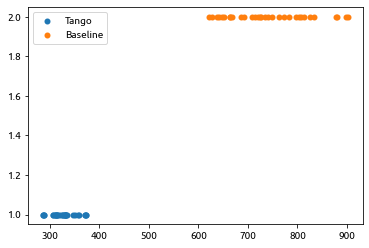

In [13]:
plt.scatter(df["Tango costs"],np.ones(tango_costs_norm.size),marker='.',linewidths=3,label = "Tango")
plt.scatter(df["Baseline costs"],2*np.ones(baseline_costs_norm.size),marker='.',linewidths=3,label = "Baseline")
plt.legend()

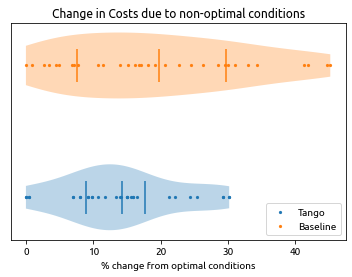

In [14]:
plt.violinplot(tango_costs_norm,positions=[1],vert=False,showmeans=True,showextrema=False,quantiles=[0.25,0.75])
plt.violinplot(baseline_costs_norm,positions=[2],vert=False,showmeans=True,showextrema=False,quantiles=[0.25,0.75])
plt.scatter(tango_costs_norm,np.ones(tango_costs_norm.size),marker='.',linewidths=0.2,label = "Tango")
plt.scatter(baseline_costs_norm,2*np.ones(baseline_costs_norm.size),marker='.',linewidths=0.2,label = "Baseline")
plt.yticks([])
plt.xlabel("% change from optimal conditions")
plt.legend(loc="lower right")
plt.title("Change in Costs due to non-optimal conditions")
plt.savefig(outdir+"cost_change_pct.png",dpi=300)

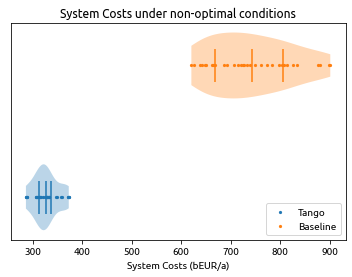

In [15]:
plt.violinplot(df["Tango costs"],positions=[1],vert=False,showmeans=True,showextrema=False,quantiles=[0.25,0.75])
plt.violinplot(df["Baseline costs"],positions=[2],vert=False,showmeans=True,showextrema=False,quantiles=[0.25,0.75])
plt.scatter(df["Tango costs"],np.ones(tango_costs_norm.size),marker='.',linewidths=0.2,label = "Tango")
plt.scatter(df["Baseline costs"],2*np.ones(baseline_costs_norm.size),marker='.',linewidths=0.2,label = "Baseline")
plt.yticks([])
plt.xlabel("System Costs (bEUR/a)")
plt.legend(loc="lower right")
plt.title("System Costs under non-optimal conditions")
plt.savefig(outdir+"cost_total.png",dpi=300)

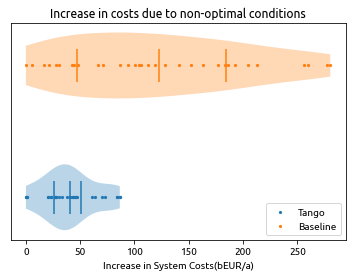

<Figure size 432x288 with 0 Axes>

In [16]:
plt.violinplot(df["Tango diff"],positions=[1],vert=False,showmeans=True,showextrema=False,quantiles=[0.25,0.75])
plt.violinplot(df["Baseline diff"],positions=[2],vert=False,showmeans=True,showextrema=False,quantiles=[0.25,0.75])
plt.scatter(df["Tango diff"],np.ones(tango_costs_norm.size),marker='.',linewidths=0.2,label = "Tango")
plt.scatter(df["Baseline diff"],2*np.ones(baseline_costs_norm.size),marker='.',linewidths=0.2,label = "Baseline")
plt.yticks([])
plt.xlabel("Increase in System Costs(bEUR/a)")
plt.legend(loc="lower right")
plt.title("Increase in costs due to non-optimal conditions")
plt.show()
plt.savefig(outdir+"cost_change.png",dpi=300)

In [17]:
stats = pd.DataFrame(index=["Tango","Baseline"],columns = ["mean","mean (% of optimal)","std dev","std dev (% of optimal)"])

stats.loc["Tango","mean"] = np.mean(df["Tango costs"])
stats.loc["Tango","std dev"] = np.std(df["Tango costs"])
stats.loc["Tango","mean (% of optimal)"] = np.mean(df["Tango costs"])/np.min(df["Tango costs"])*100
stats.loc["Tango","std dev (% of optimal)"] = np.std(df["Tango costs"])/np.min(df["Tango costs"])*100

stats.loc["Baseline","mean"] = np.mean(df["Baseline costs"])
stats.loc["Baseline","std dev"] = np.std(df["Baseline costs"])
stats.loc["Baseline","mean (% of optimal)"] = np.mean(df["Baseline costs"])/np.min(df["Baseline costs"])*100
stats.loc["Baseline","std dev (% of optimal)"] = np.std(df["Baseline costs"])/np.min(df["Baseline costs"])*100

stats.to_csv(outdir+"stats.csv")

In [37]:
bsl = pd.DataFrame((df["Baseline costs"]/df["Baseline costs"].min()-1).describe())
tng = pd.DataFrame((df["Tango costs"]/df["Tango costs"].min()-1).describe())
(pd.concat([bsl,tng],axis=1)*100).drop("count").T.to_csv(outdir+"stats_all.csv")

In [44]:
bsl1 = pd.DataFrame(((df["Baseline diff"])).describe())
tng1 = pd.DataFrame(((df["Tango diff"])).describe())
overshoot_stats = (pd.concat([bsl1,tng1],axis=1)).drop("count").T

overshoot_stats

,mean,std,min,25%,50%,75%,max
Baseline diff,122.235824,83.038685,0.0,47.13159,109.341208,183.998573,280.350962
Tango diff,40.669685,25.193602,0.0,25.52282,40.395848,50.769516,86.489172


In [46]:
overshoot_stats_pct = overshoot_stats.copy(deep=True)
overshoot_stats_pct.loc['Baseline diff'] = overshoot_stats.loc['Baseline diff']/df['Baseline costs'].min()*100
overshoot_stats_pct.loc['Tango diff'] = overshoot_stats.loc['Tango diff']/df['Tango costs'].min()*100

overshoot_stats_pct

,mean,std,min,25%,50%,75%,max
Baseline diff,19.694202,13.378898,0.0,7.593674,17.616667,29.645196,45.169151
Tango diff,14.185474,8.787459,0.0,8.902289,14.089961,17.708267,30.167185


620.6690977631899

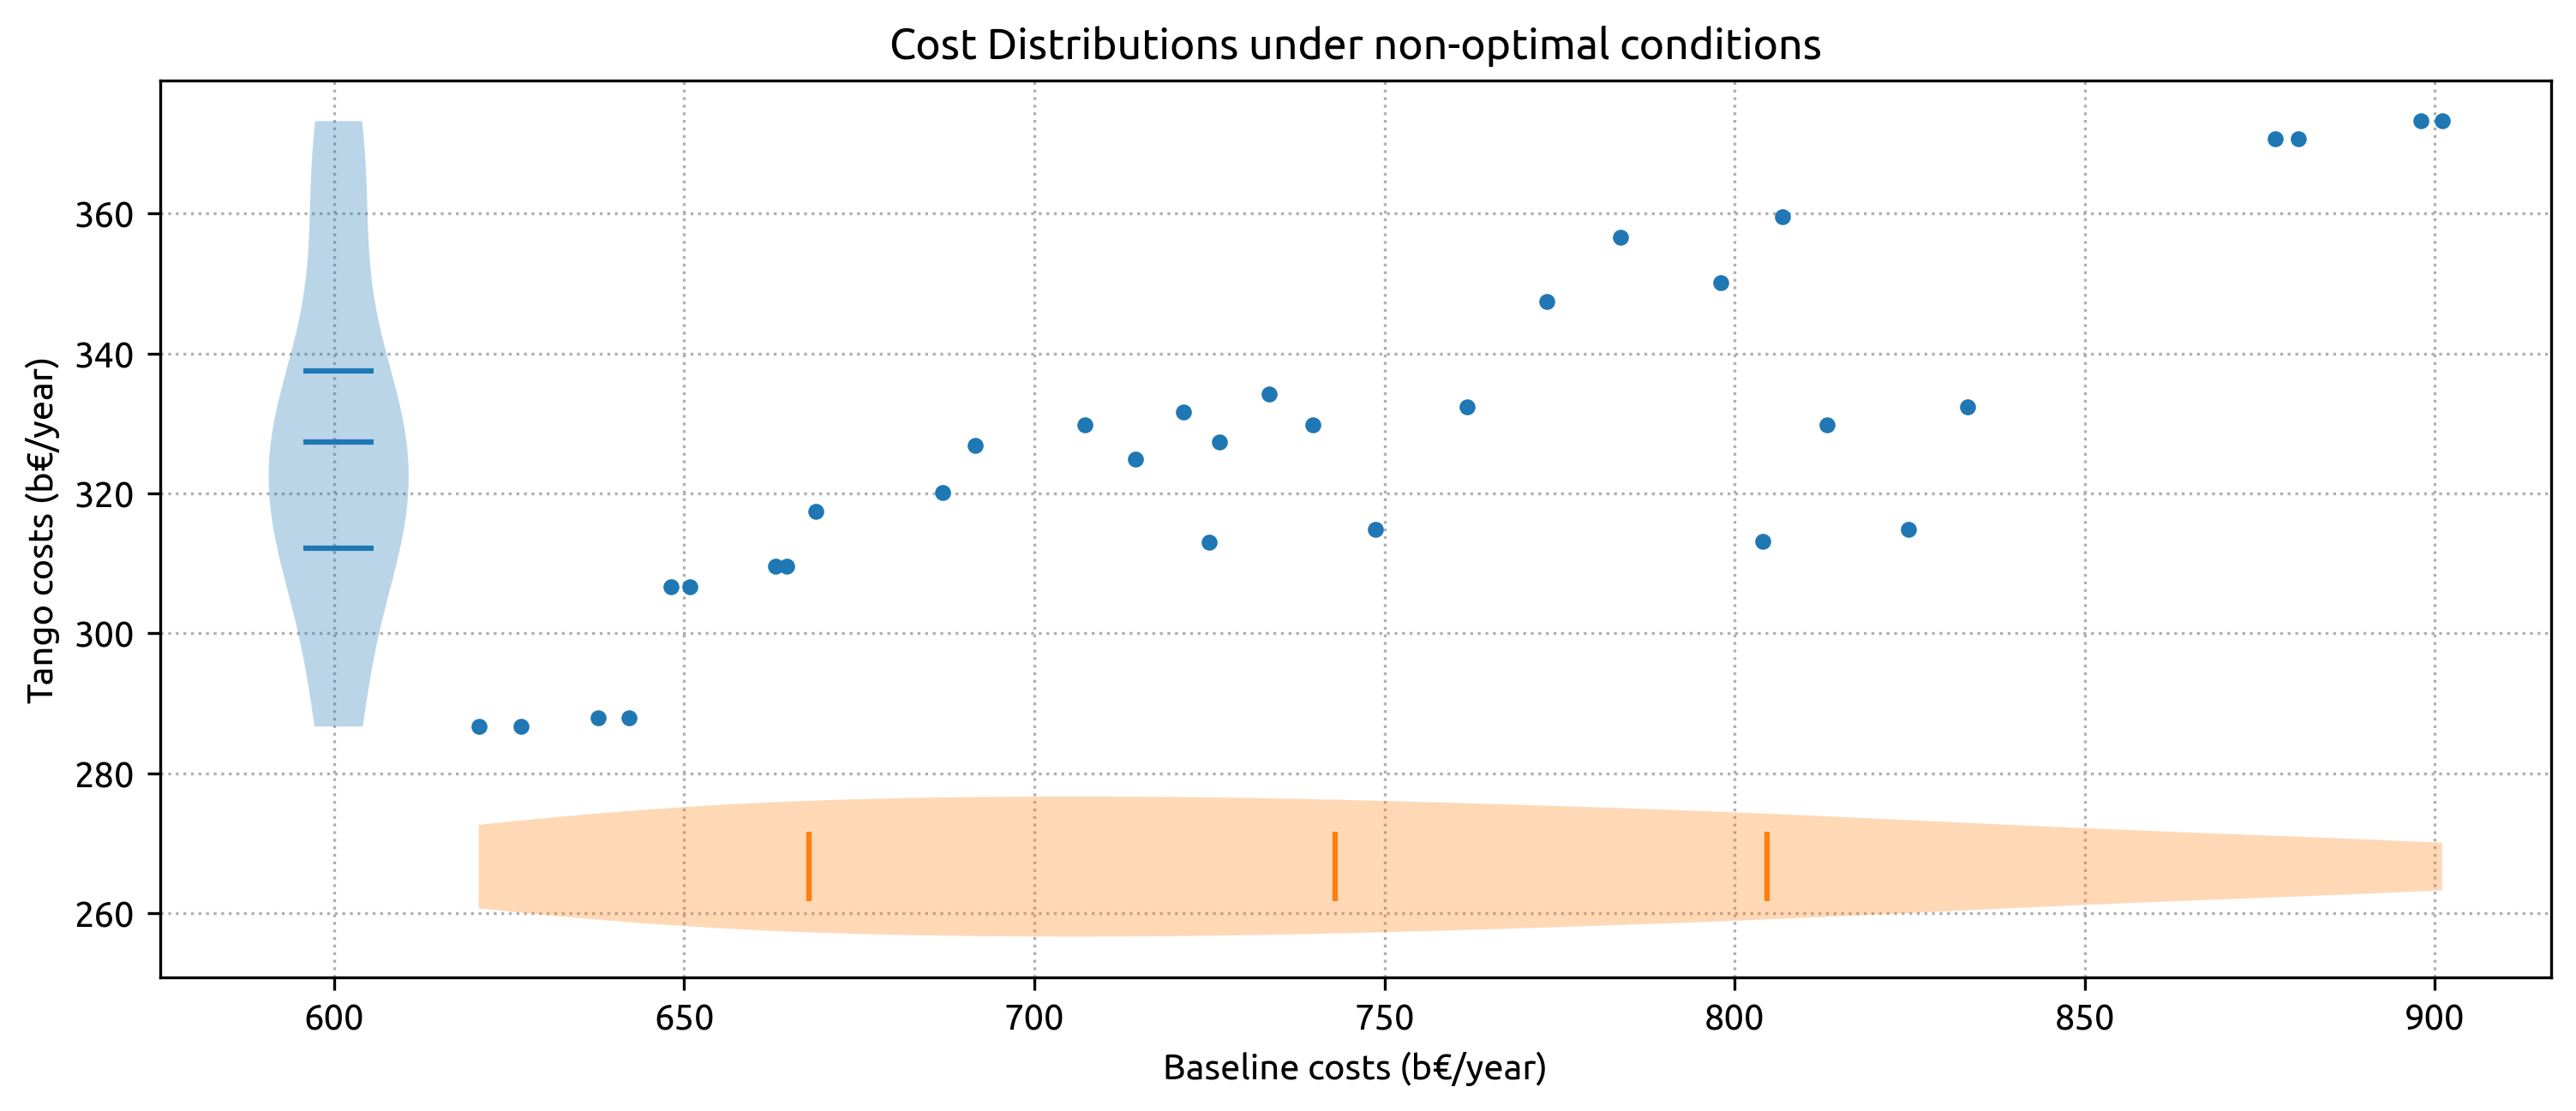

In [436]:
fig, ax = plt.subplots(figsize=(12,8),dpi=300)

ax.scatter(df['Baseline costs'],df['Tango costs'],s=12)
ax.violinplot(df["Tango costs"],positions=[df["Baseline costs"].min()-20],vert=True,showmeans=True,showextrema=False,quantiles=[0.25,0.75],widths=20)
ax.violinplot(df["Baseline costs"],positions=[df["Tango costs"].min()-20],vert=False,showmeans=True,showextrema=False,quantiles=[0.25,0.75],widths=20)
ax.set_xlabel("Baseline costs (b€/year)")
ax.set_ylabel("Tango costs (b€/year)")
ax.set_aspect('equal', 'box')
ax.set_title("Cost Distributions under non-optimal conditions")

ax.set_axisbelow(True)
ax.grid(visible=True,linestyle=":")
plt.savefig(outdir+"cost_scatter+violin.png",dpi=300)

/home/poweruser/anaconda3/envs/pypsa-eur/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



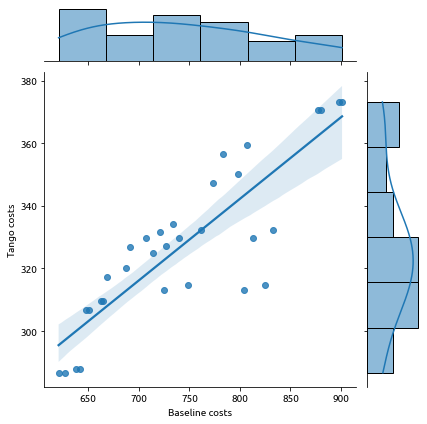

In [452]:
import seaborn as sns

sns.jointplot(
    df['Baseline costs'],df['Tango costs'],
    kind="reg"
)

# Single parameter sweeps

In [47]:
sweep_dict = {"ICE share" : "sweep_nonopt_iceshare",
           "Gas Price" : "sweep_nonopt_gasprice",
           "DAC Cost" : "sweep_nonopt_daccost",
            "CC Cost" : "sweep_nonopt_cc_cost",
            "VRE Potential" : "sweep_nonopt_vre_potential",
            "H2 Network" : "sweep_nonopt_h2net",
            "Demand Level" : "tango_sweep",
           }
val_dict = {"ICE share" : [0, 0.1,0.2,0.3,0.4,0.5],
           "Gas Price" : [1,2,4,8],
           "DAC Cost" : [1,2,4,8,16],
            "CC Cost" : [1,2,4,8,16],
            "VRE Potential" : [1.0,0.9,0.8,0.7,0.6,0.5],
            "H2 Network" : [1,0],
            "Demand Level" : get_tfec("tango_sweep")["TFEC [TWh]"].values
           }
default_run = "results/sweep_nonopt_default/csvs/costs.csv"

/tmp/ipykernel_24168/2163050415.py:6: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [48]:
default = load_pypsa_csv(default_run).sum()

cost_dict = {}
for r in sweep_dict.keys():
    if not r=="Demand Level":
        cost_dict[r] = pd.concat([default, load_pypsa_csv("results/"+sweep_dict[r]+"/csvs/costs.csv").sum()])/1e9
    else:
        cost_dict[r] = load_pypsa_csv("results/"+sweep_dict[r]+"/csvs/costs.csv").sum()/1e9


/tmp/ipykernel_24168/2163050415.py:6: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.

/tmp/ipykernel_24168/2163050415.py:6: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.

/tmp/ipykernel_24168/2163050415.py:6: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.

/tmp/ipykernel_24168/2163050415.py:6: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.

/tmp/ipykernel_24168/2163050415.py:6: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.

/tmp/ipykernel_24168/2163050415.py:6: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.

/tmp/ipykernel_24168/2163050415.py:6: PerformanceWarning:

dropping on a non-lexsorted multi-index w

ICE share
Gas Price
DAC Cost
CC Cost
VRE Potential
H2 Network
Demand Level


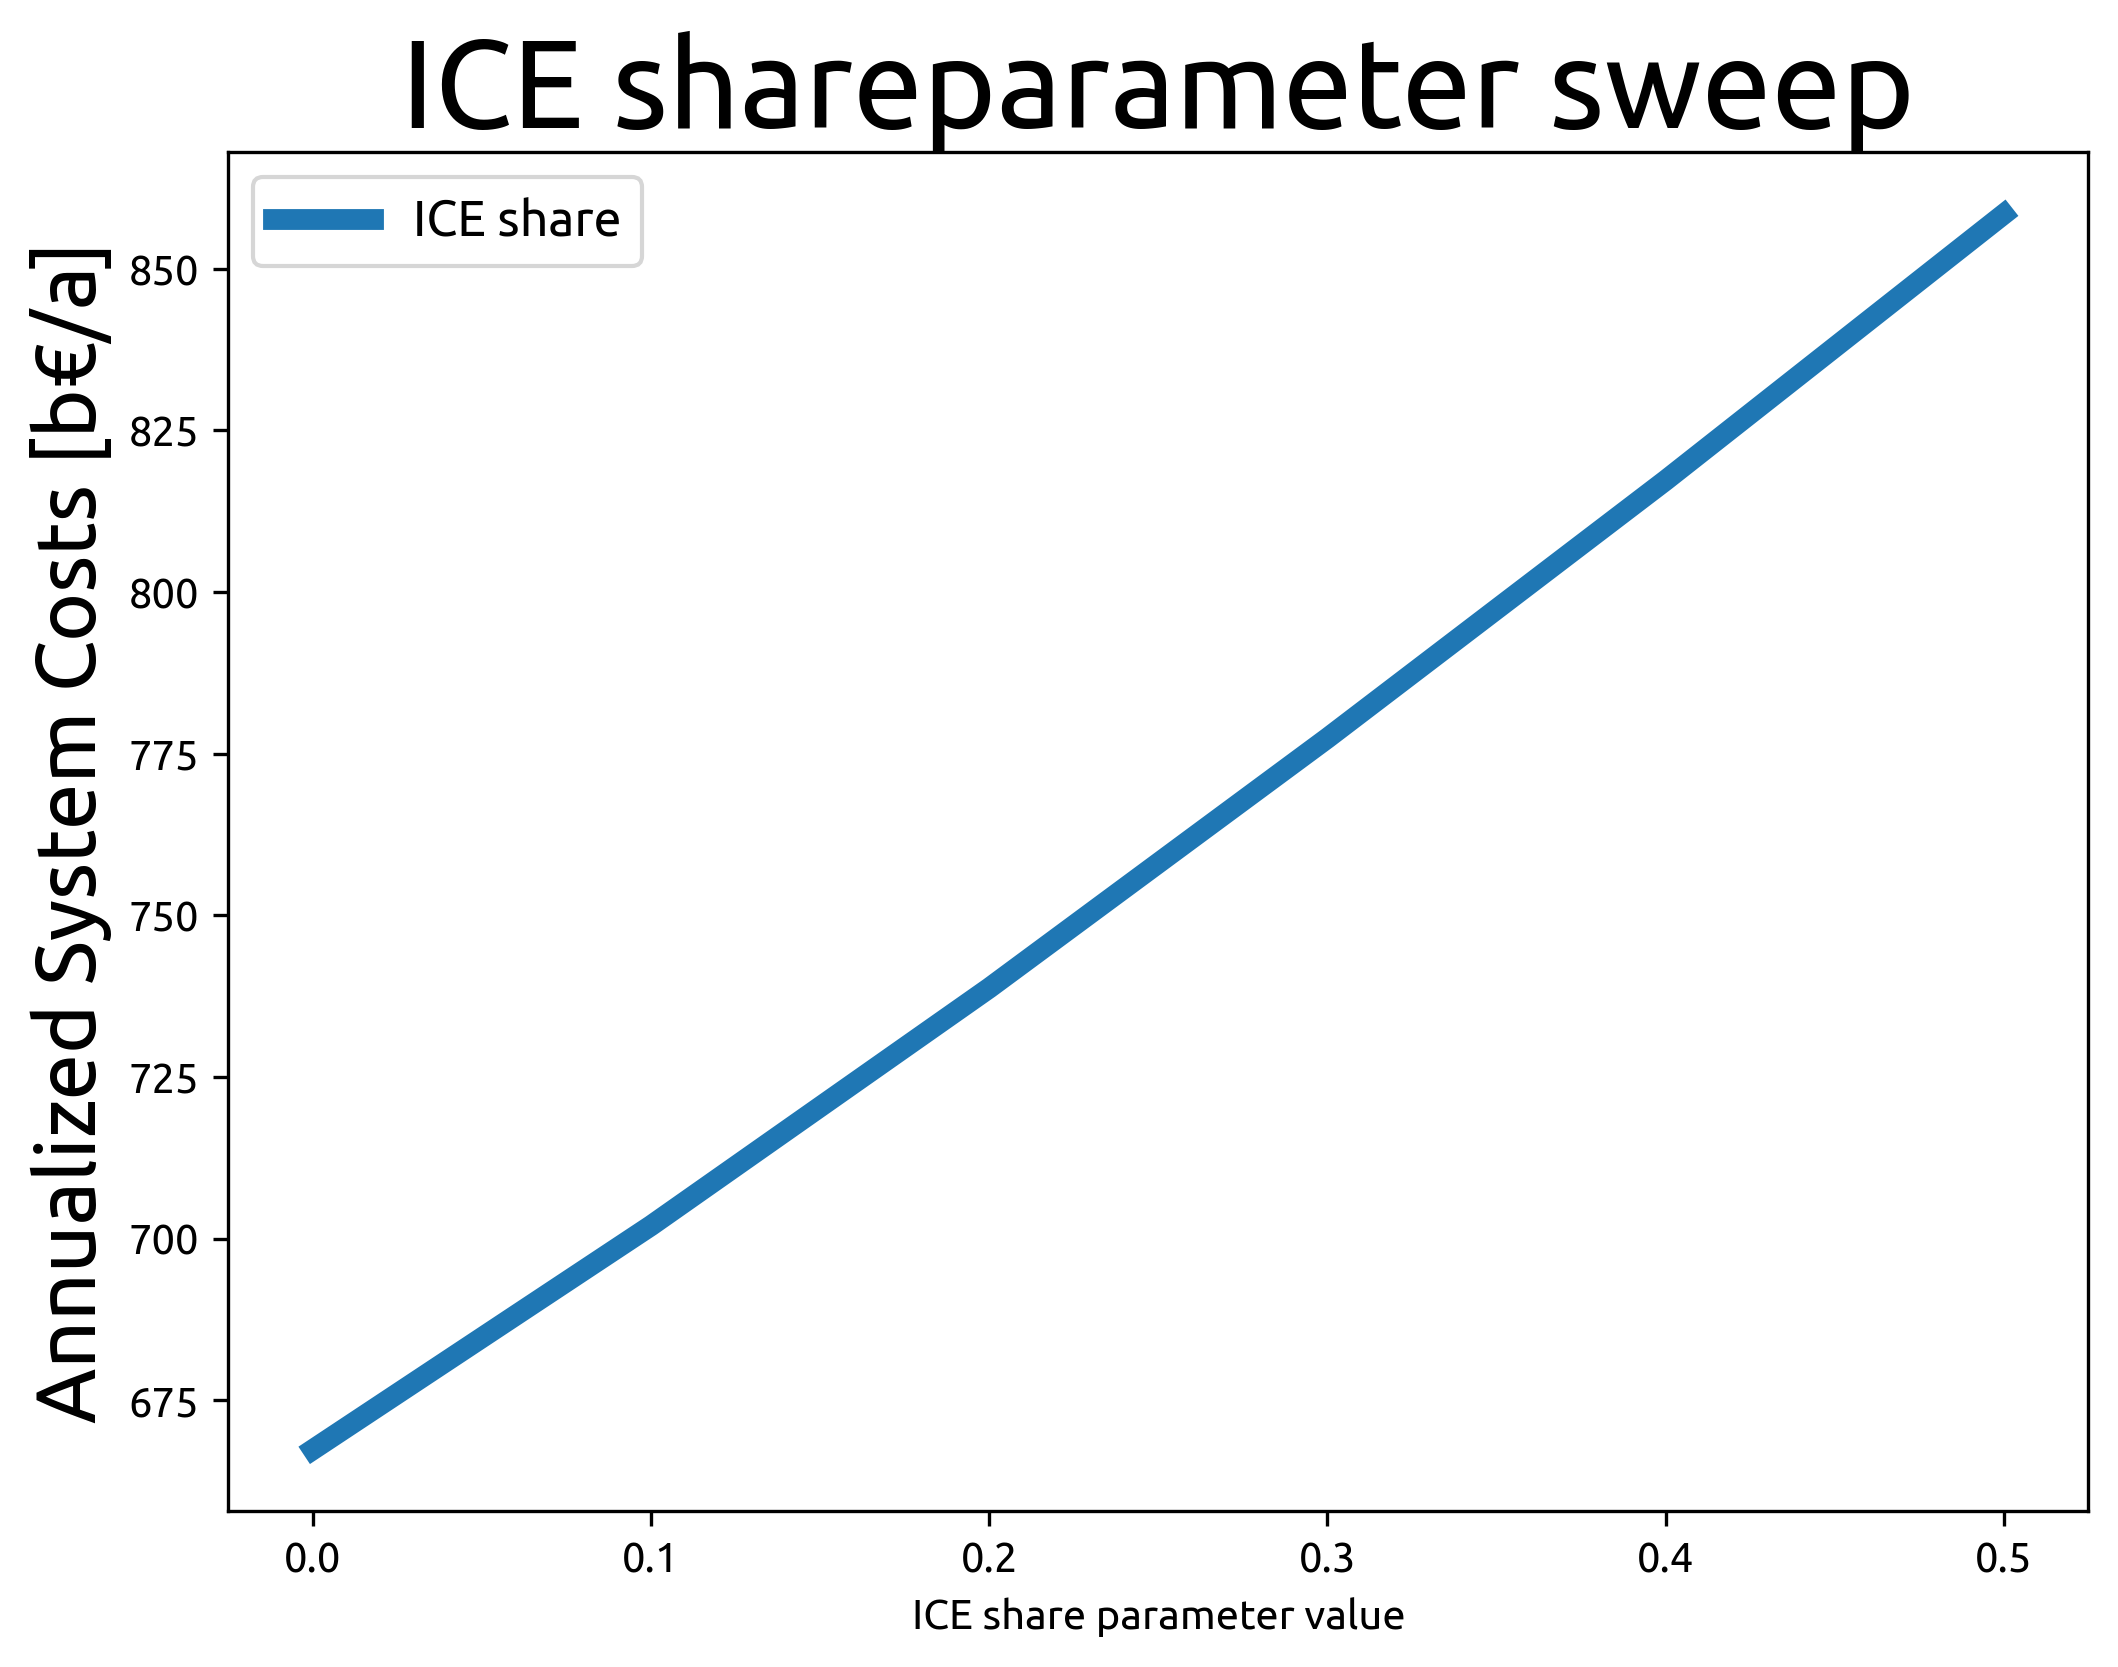

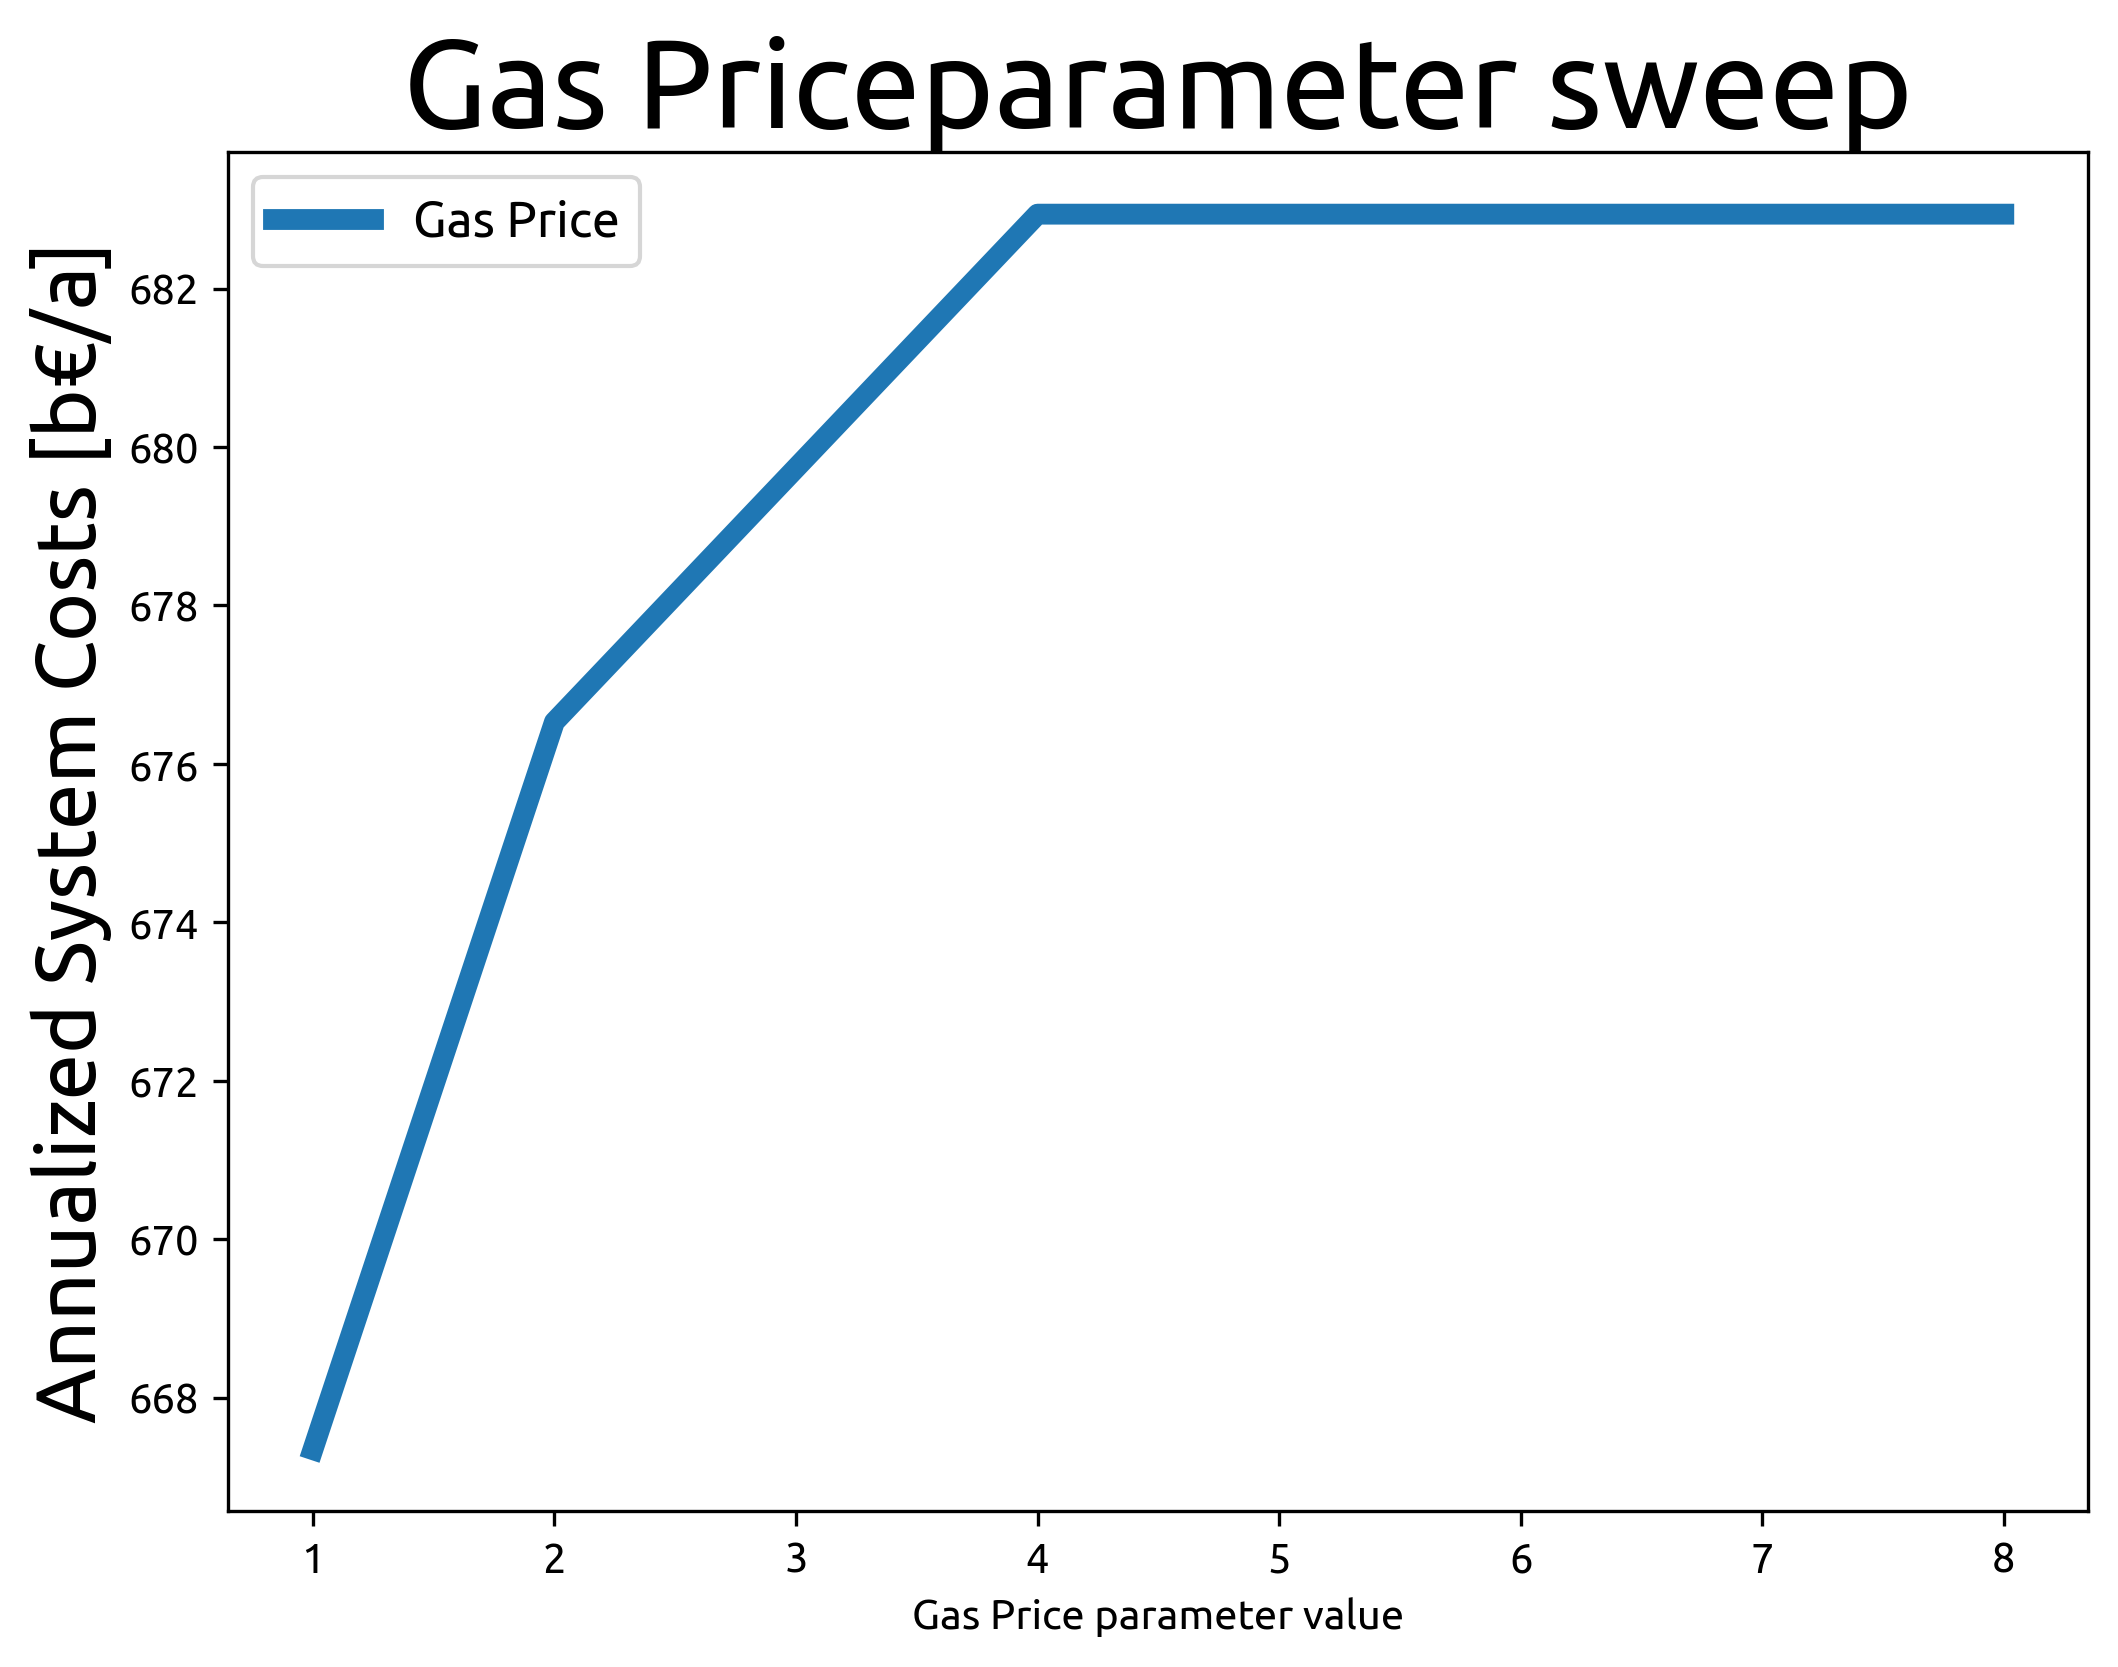

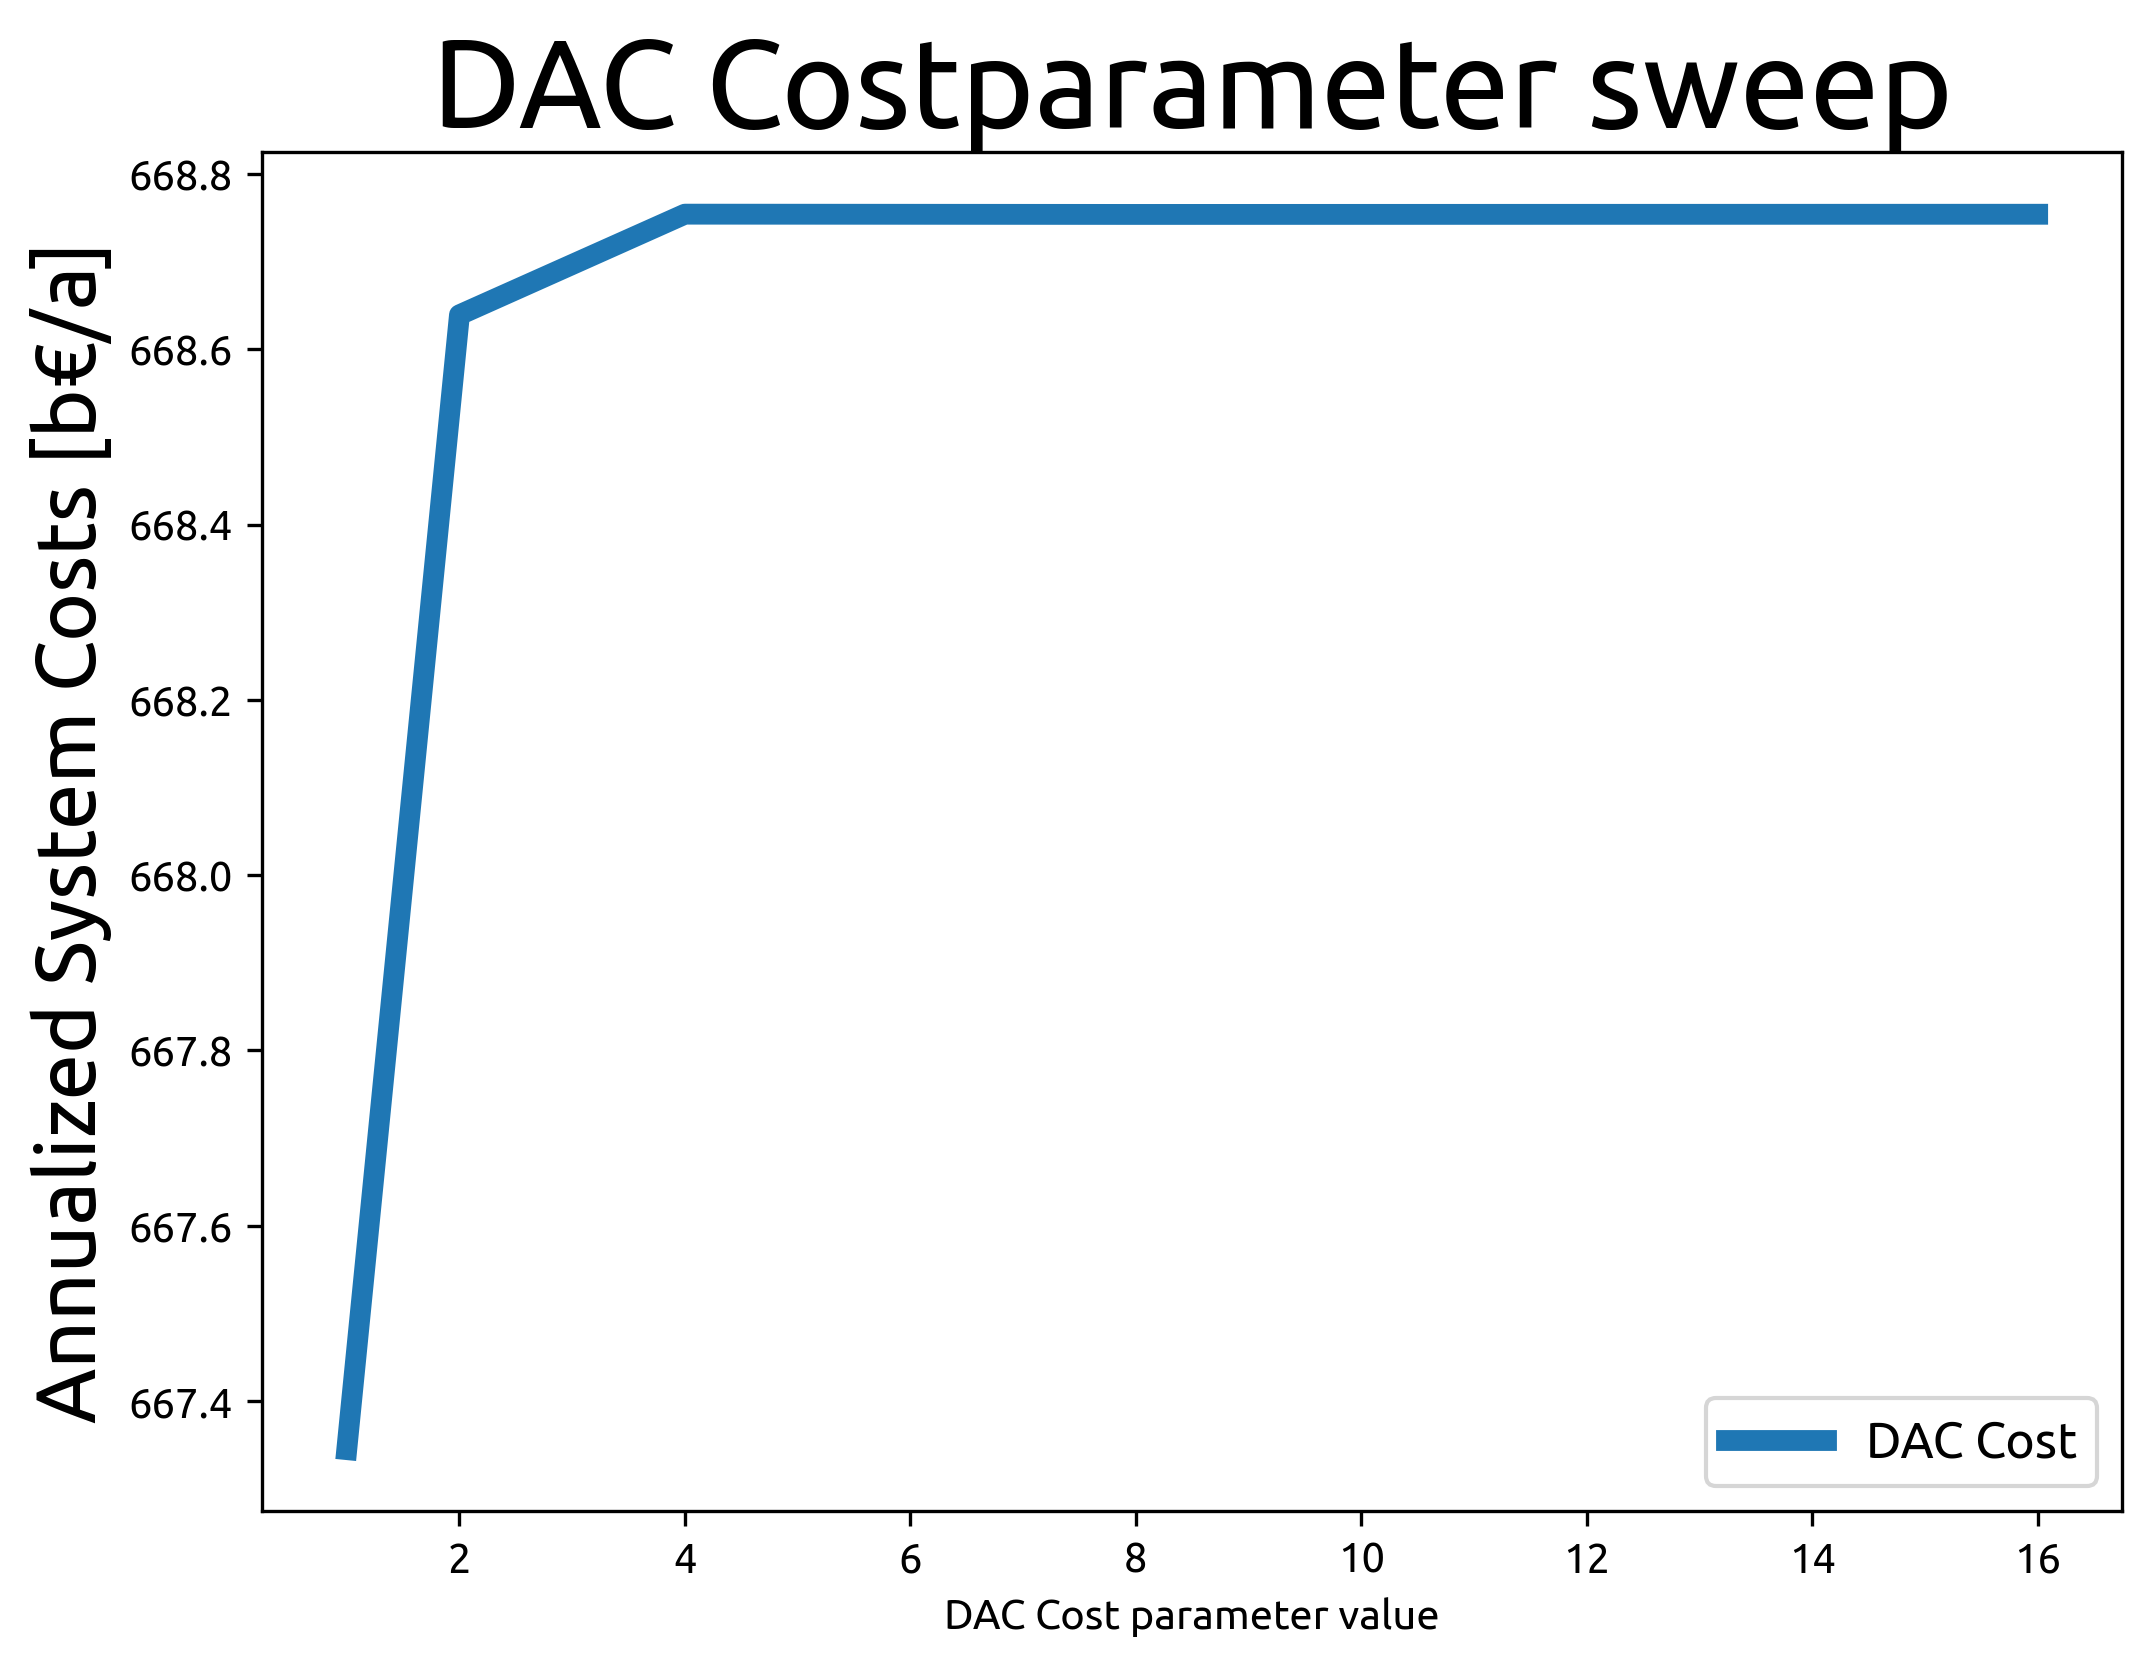

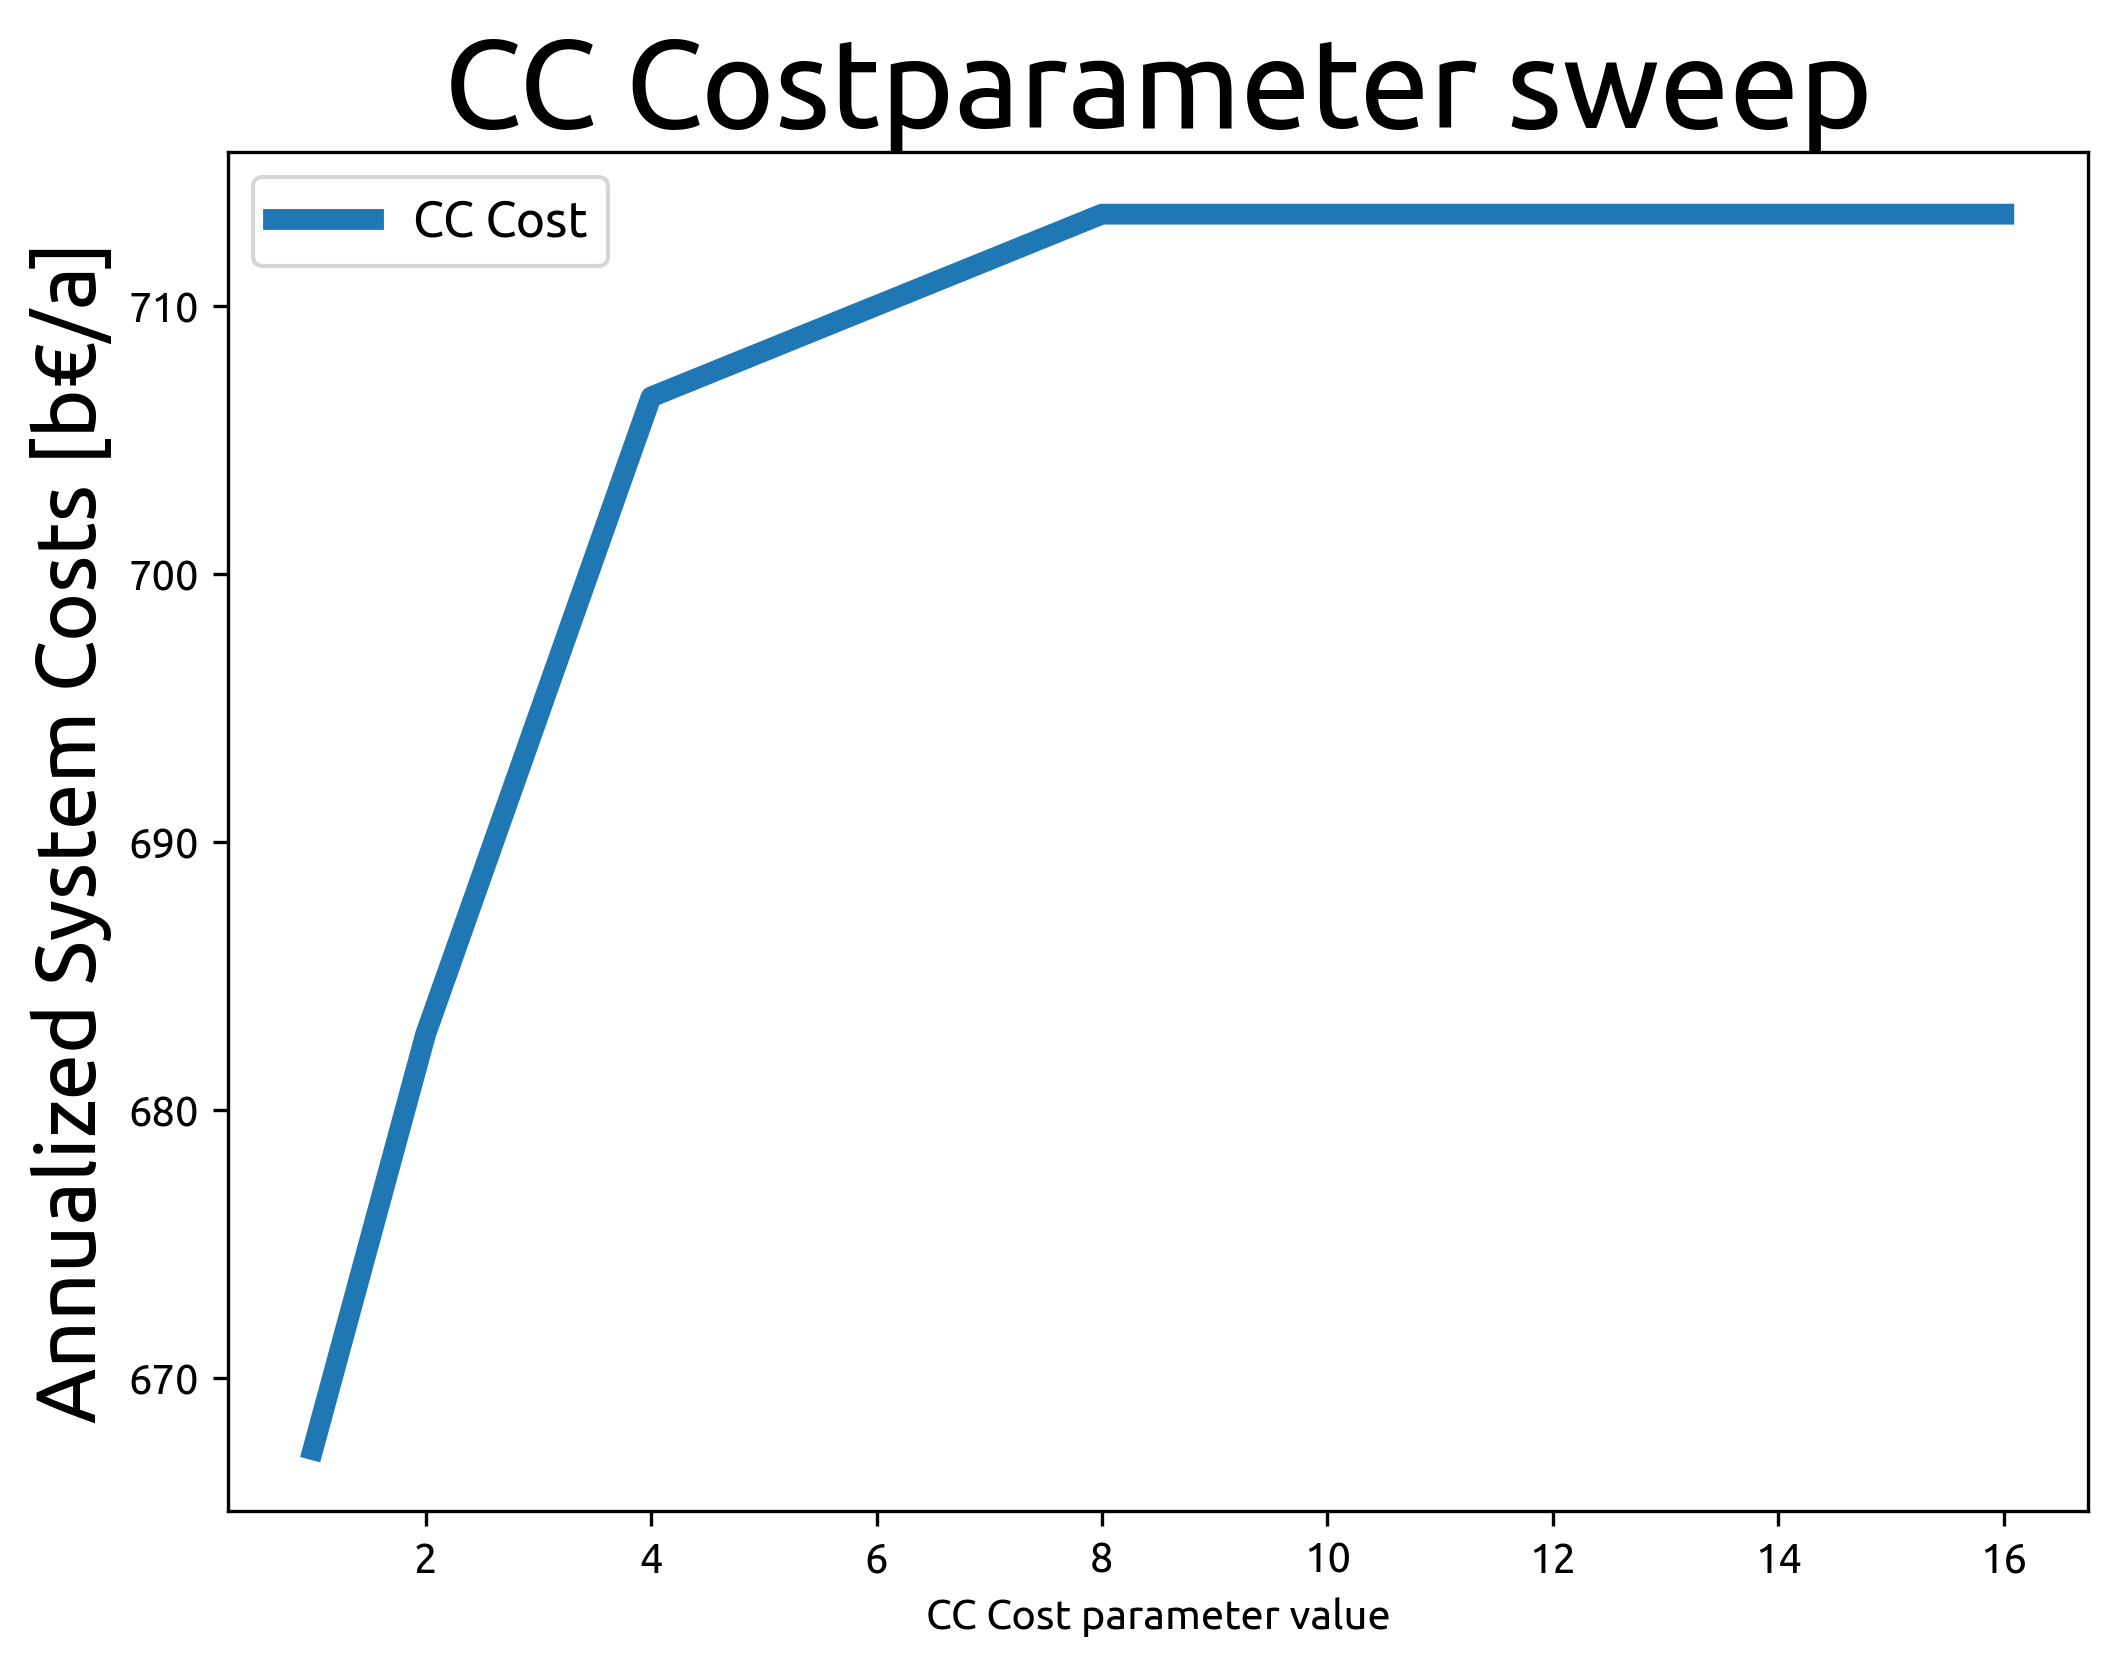

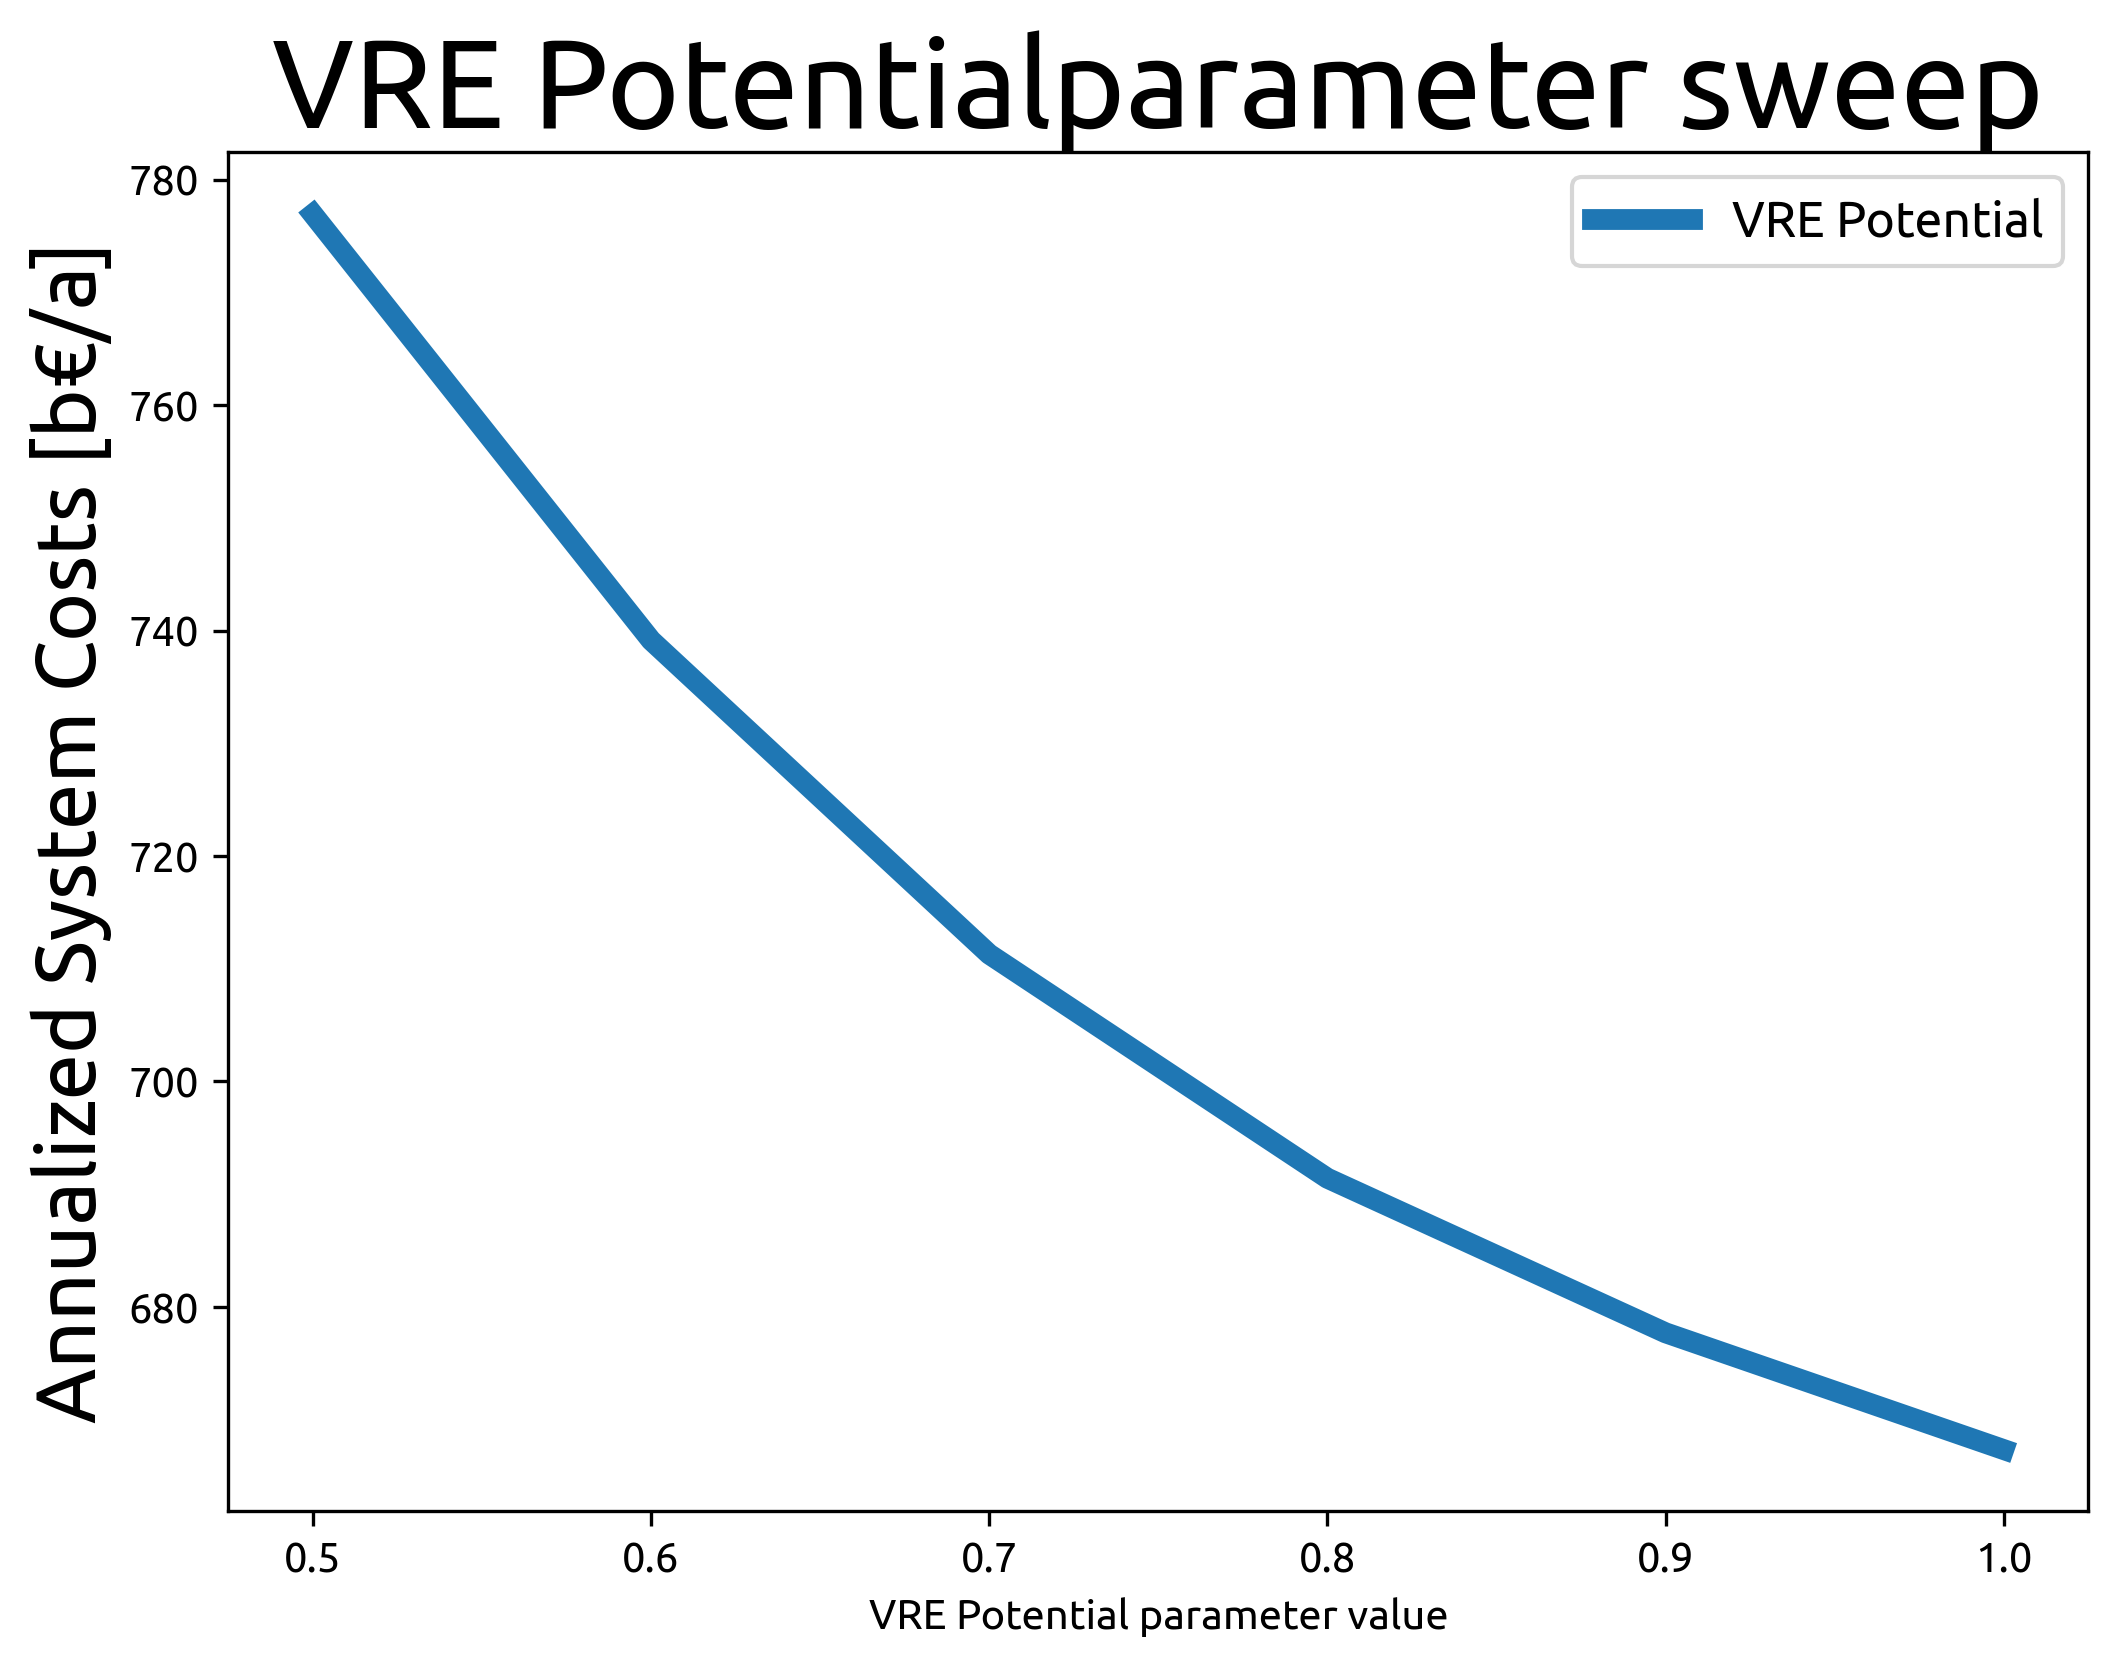

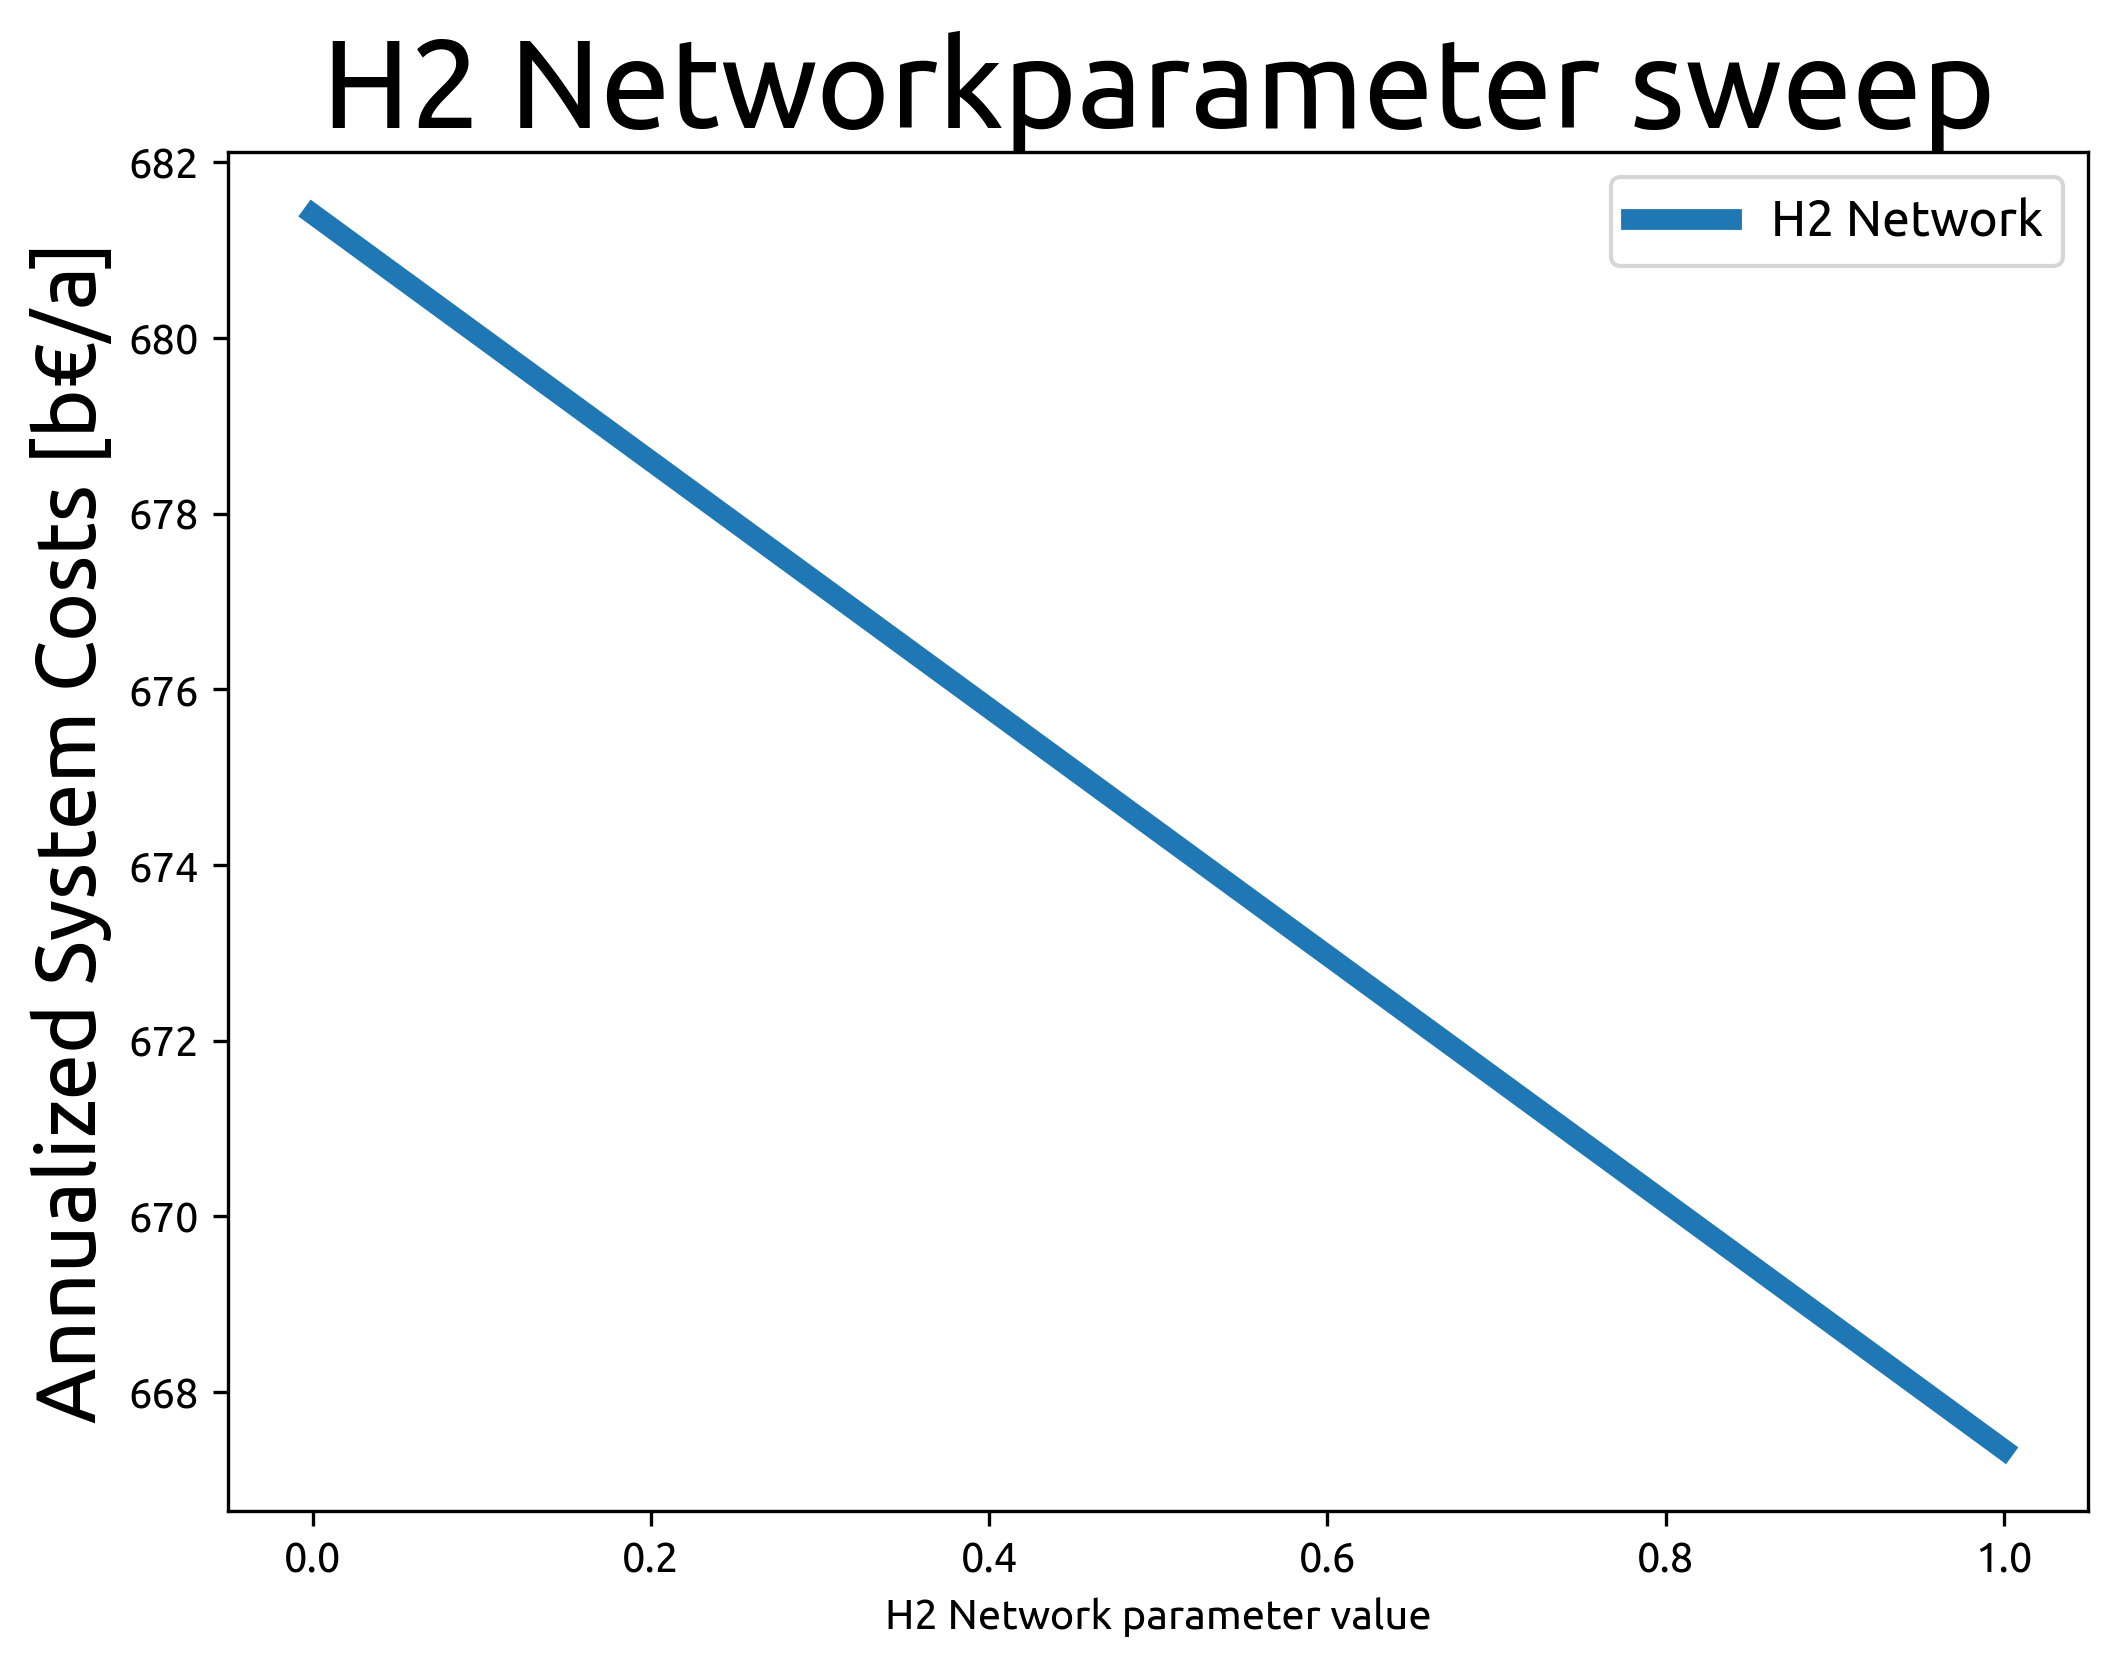

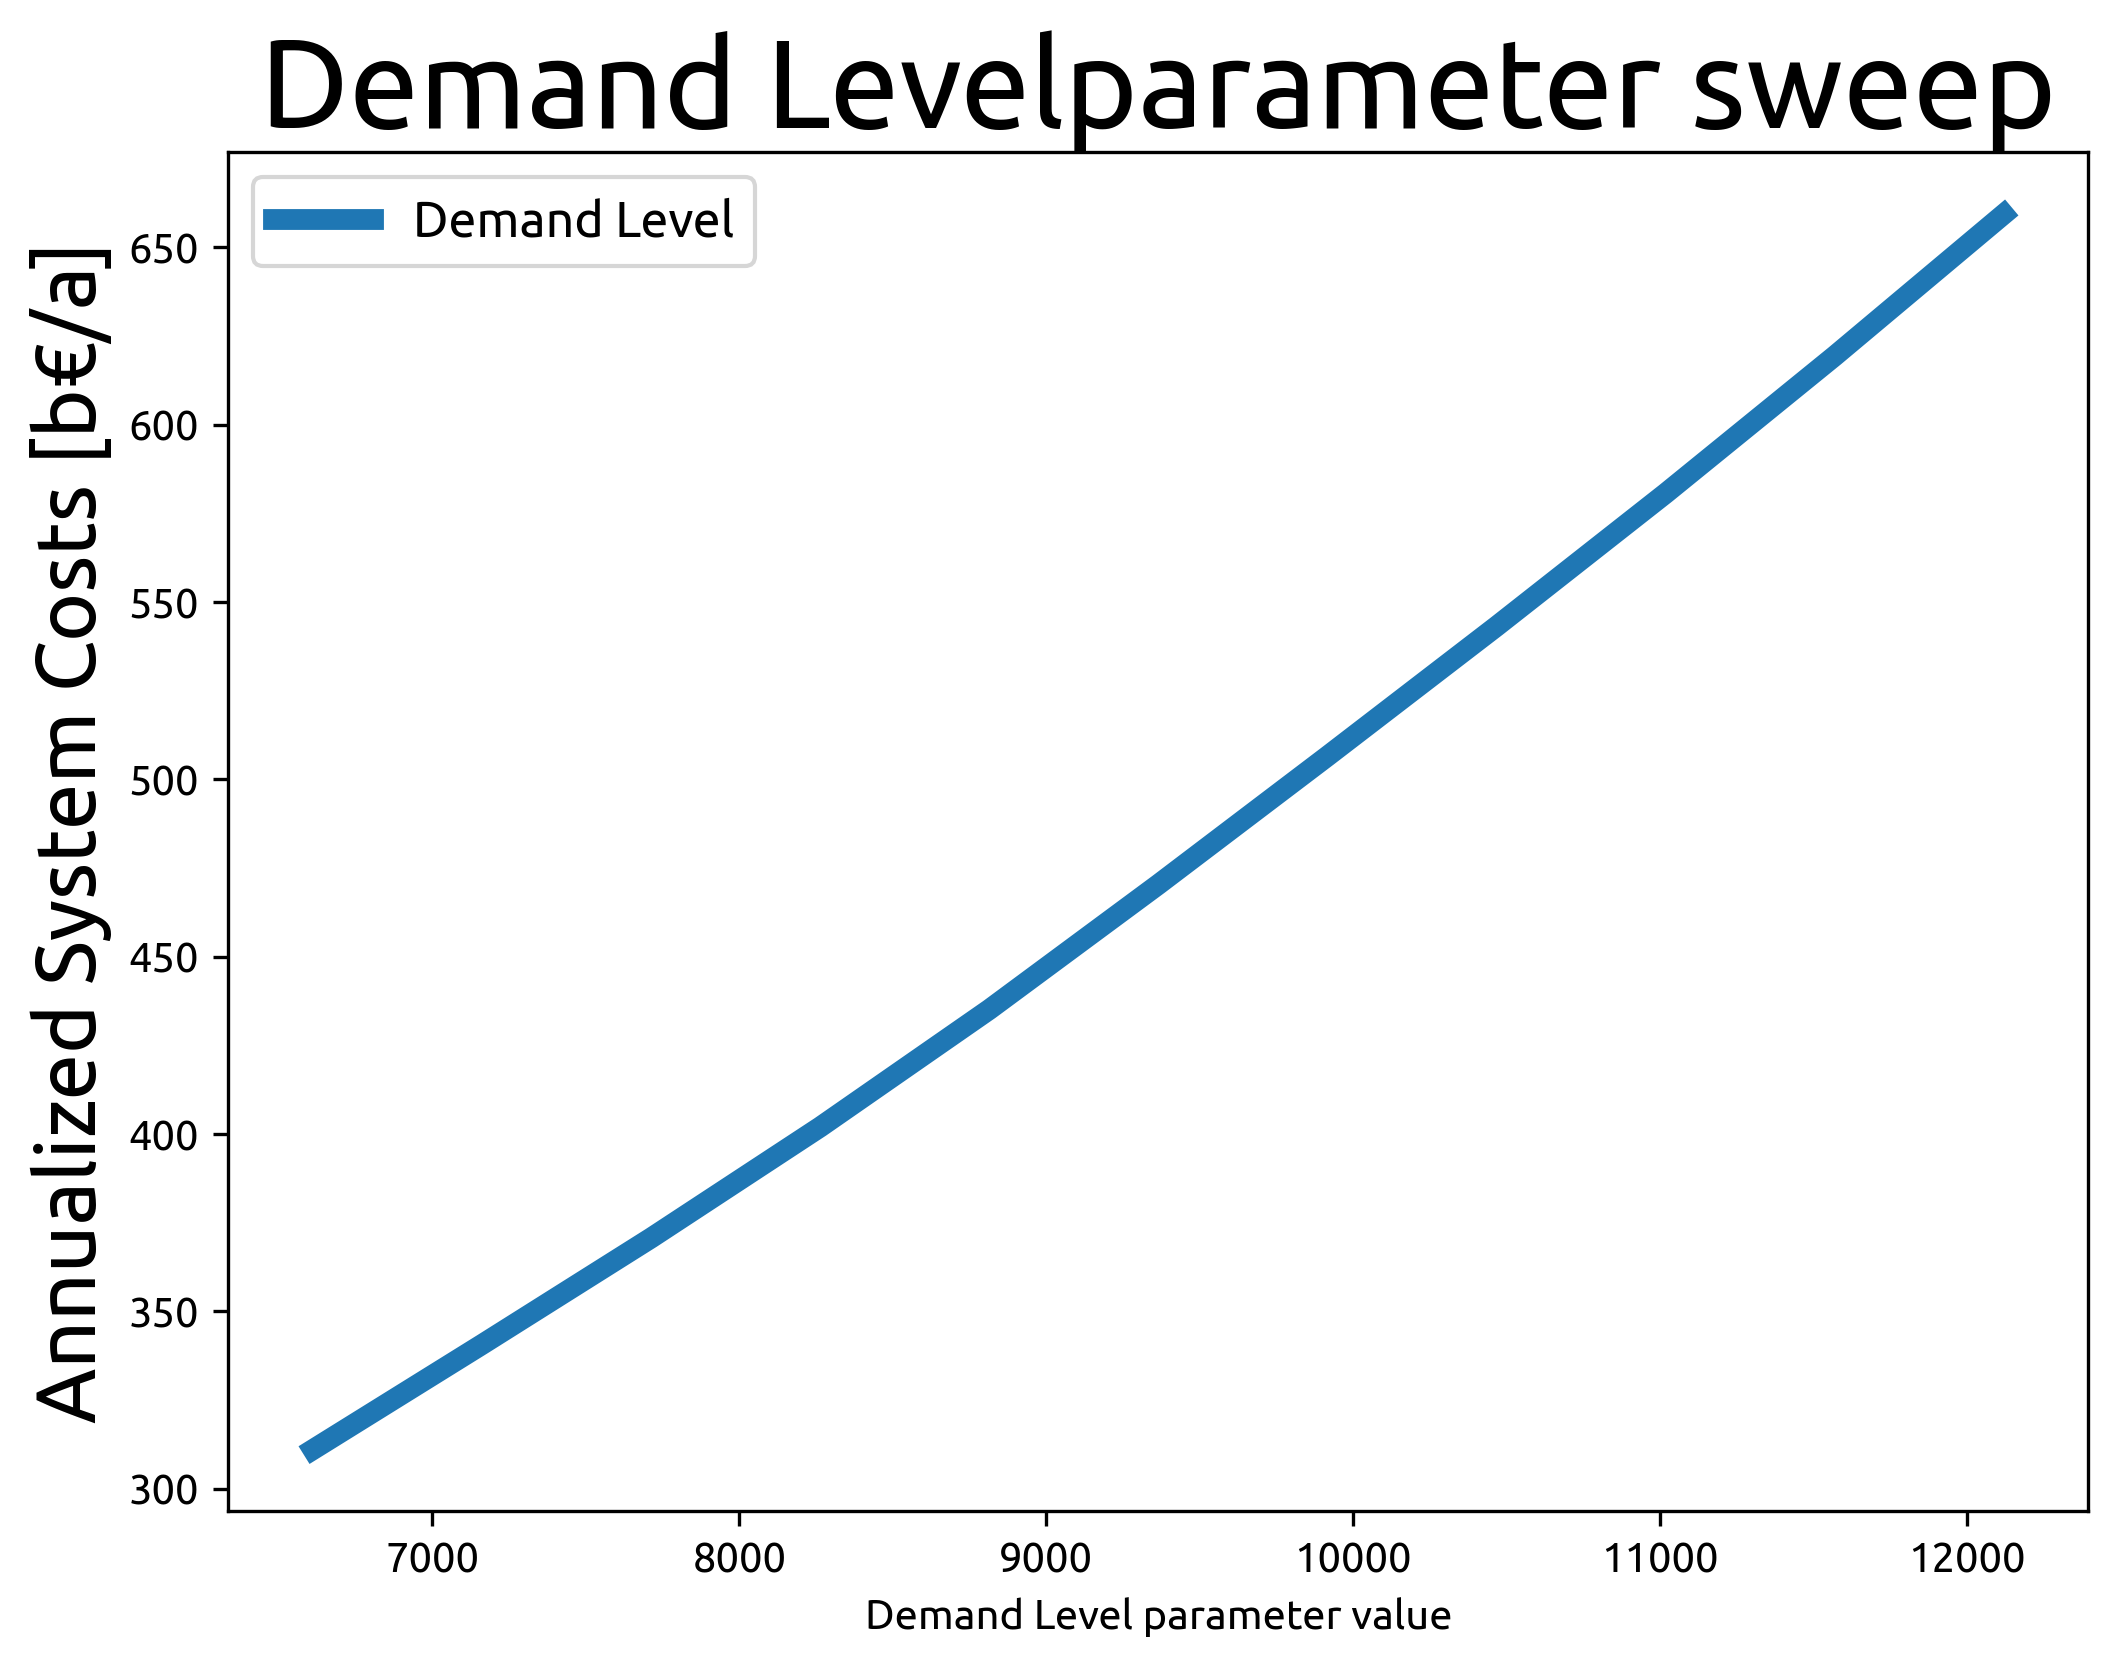

In [49]:
for r in sweep_dict.keys():
    print(r)
    fig, ax = plt.subplots(figsize=(8, 6), dpi=300)
    ax.plot(val_dict[r],cost_dict[r],label=r,linewidth=5)
    ax.set_title(r+ "parameter sweep",size=30)
    ax.set_ylabel("Annualized System Costs [b€/a]",size=20)
    ax.set_xlabel(r+ " parameter value")
    ax.legend(prop={'size': 12}) 
    outdir = "results/nonopt_test/single_param_sweeps/"
    fig.savefig(outdir+r+".png", bbox_inches='tight')

In [50]:
cost_dict["Demand Level"]
#list(val_dict["Demand Level"])

Co2L0p01-96H-T-H-B-I-A-solar+p3-dist1noscaling       659.296231
Co2L0p01-96H-T-H-B-I-A-solar+p3-dist1Tango_1of10     619.321551
Co2L0p01-96H-T-H-B-I-A-solar+p3-dist1Tango_2of10     580.582773
Co2L0p01-96H-T-H-B-I-A-solar+p3-dist1Tango_3of10     543.115838
Co2L0p01-96H-T-H-B-I-A-solar+p3-dist1Tango_4of10     506.496192
Co2L0p01-96H-T-H-B-I-A-solar+p3-dist1Tango_5of10     470.341430
Co2L0p01-96H-T-H-B-I-A-solar+p3-dist1Tango_6of10     435.086388
Co2L0p01-96H-T-H-B-I-A-solar+p3-dist1Tango_7of10     401.962677
Co2L0p01-96H-T-H-B-I-A-solar+p3-dist1Tango_8of10     370.680616
Co2L0p01-96H-T-H-B-I-A-solar+p3-dist1Tango_9of10     340.653499
Co2L0p01-96H-T-H-B-I-A-solar+p3-dist1Tango_10of10    311.030661
dtype: float64

ICE share
Gas Price
DAC Cost
CC Cost
VRE Potential
H2 Network
Demand Level


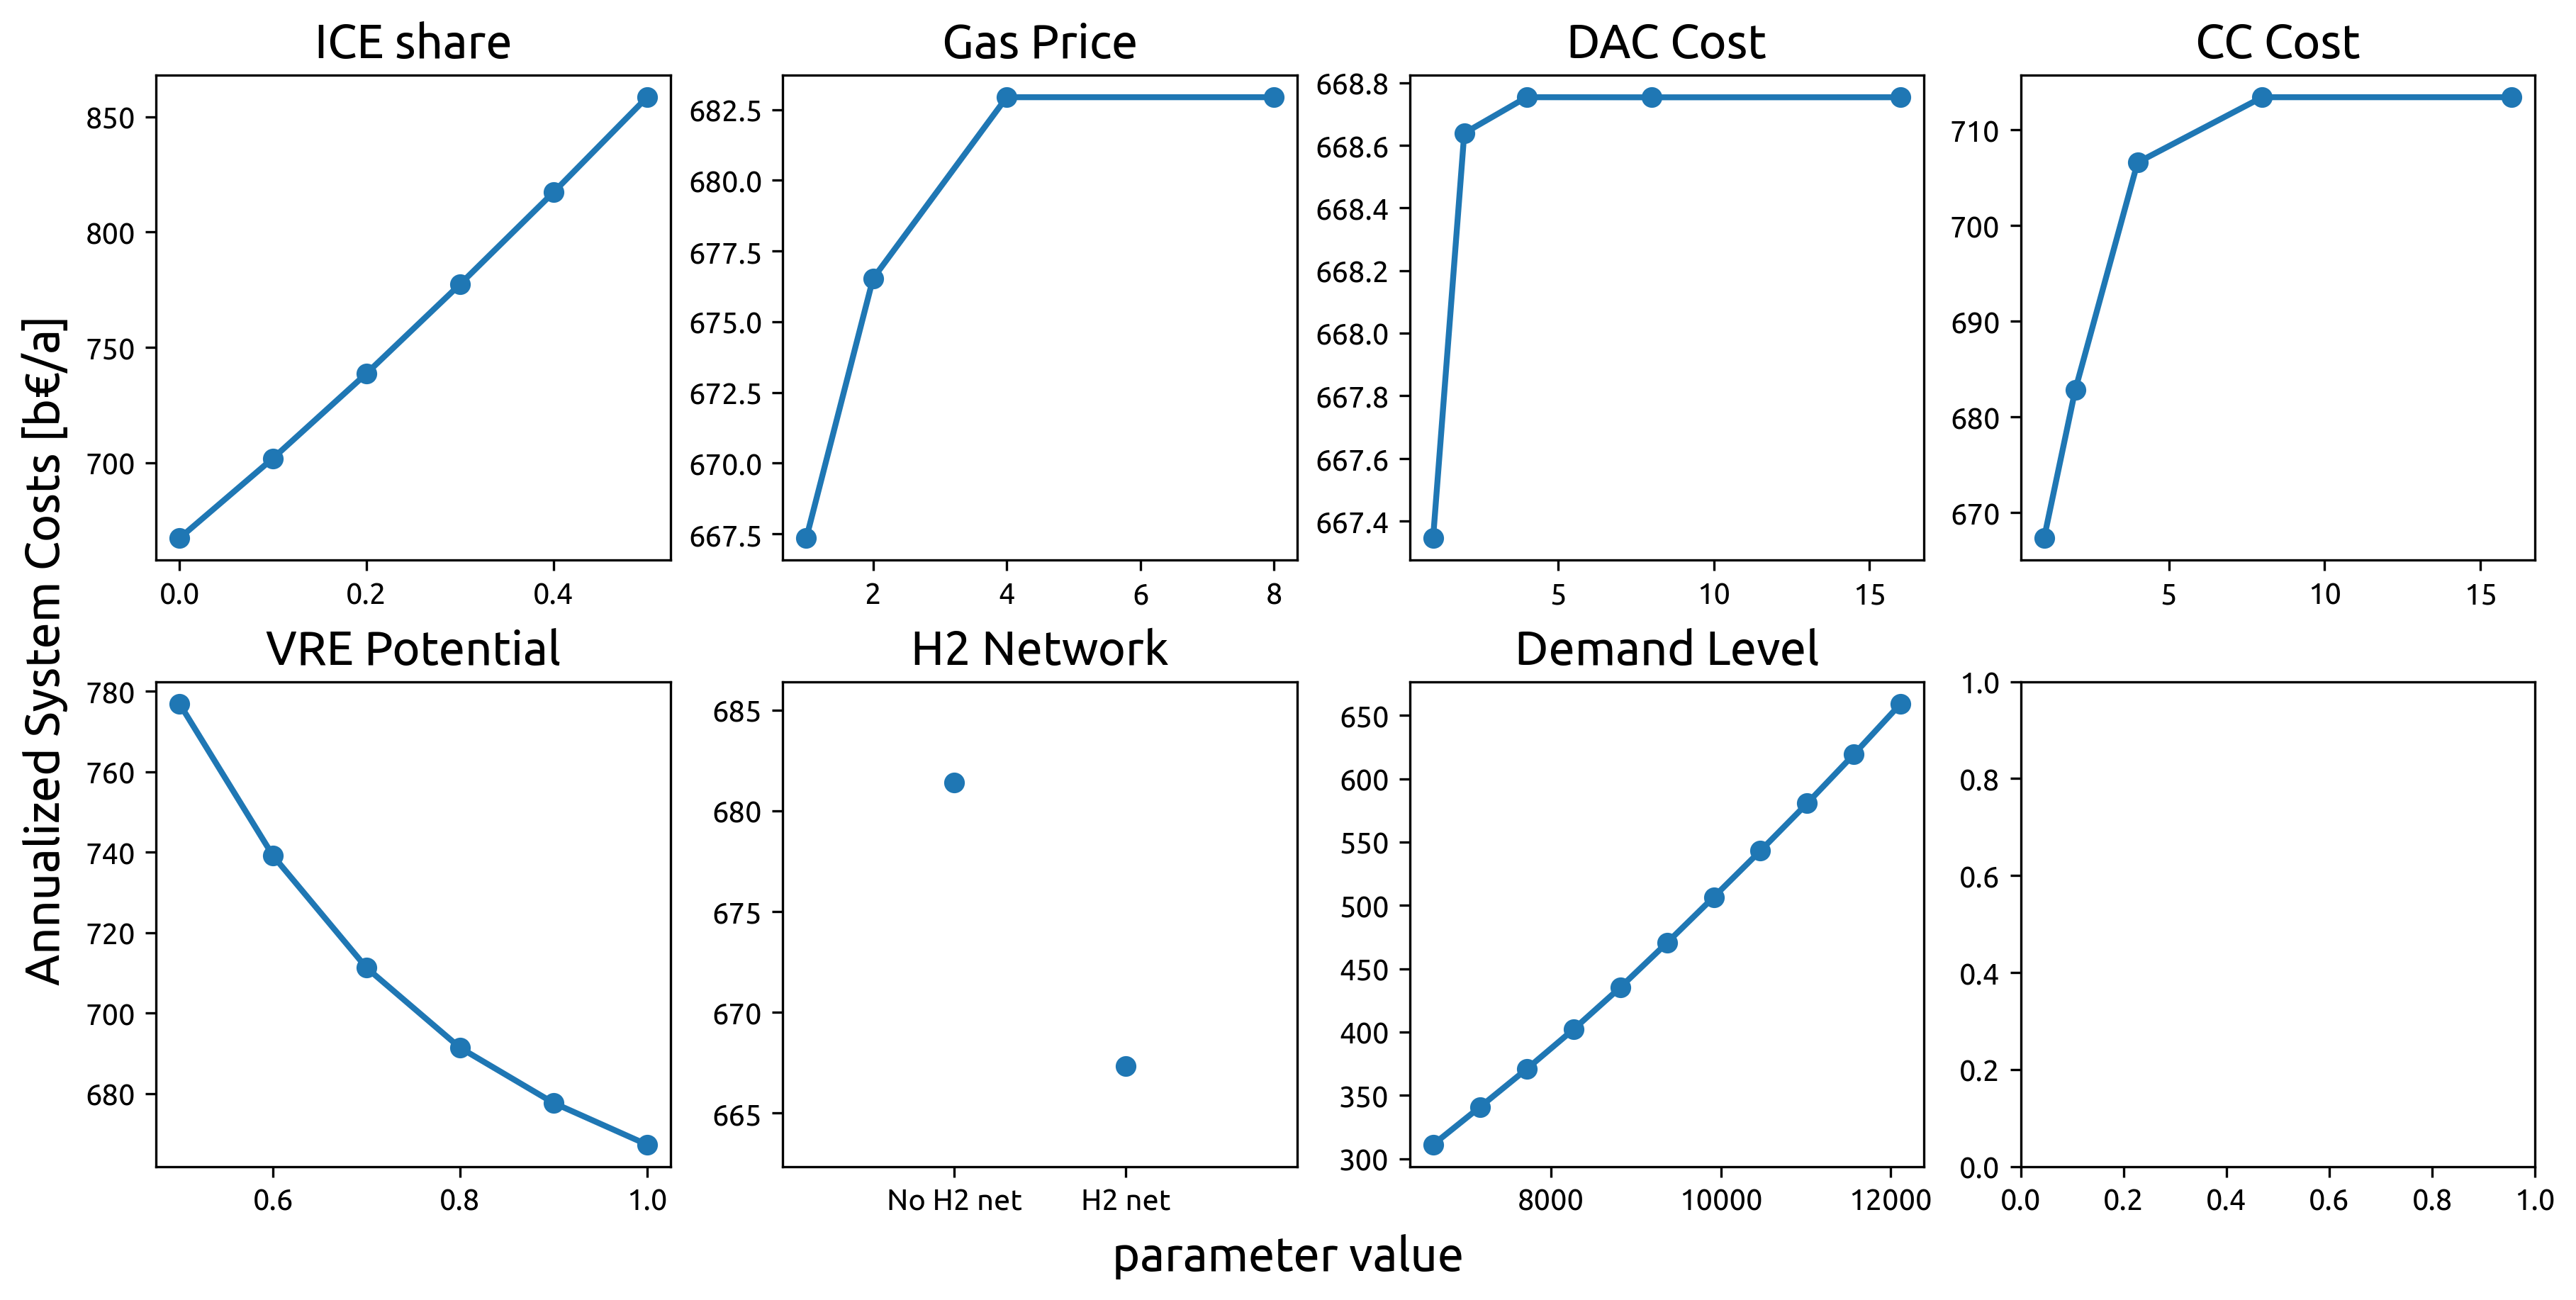

In [61]:
fig, axs = plt.subplots(2,4,figsize=(12, 6), dpi=300,constrained_layout=True)

for i in range(7):
    r = list(sweep_dict.keys())[i]
    print(r)
    ax=axs[int(i/4),i%4]
    if r == "H2 Network":
        ax.scatter(val_dict[r],cost_dict[r],label=r)
        ax.set_xlim([-1,2])
        ax.set_ylim([cost_dict[r].min()-5,cost_dict[r].max()+5])
        ax.set_xticks([0,1])
        ax.set_xticklabels(["No H2 net","H2 net"])
    else:
        ax.plot(val_dict[r],cost_dict[r],'-o',label=r,linewidth=2)
    ax.set_title(r,size=16)
    #ax.set_ylabel("Annualized System Costs [b€/a]",size=6)
    #ax.set_xlabel(r+ " parameter value",size=6)
    #ax.legend(prop={'size': 6}) 
    outdir = "results/nonopt_test/single_param_sweeps/"
fig.supylabel("Annualized System Costs [b€/a]",size=16)
fig.supxlabel("parameter value",size=16)
fig.savefig(outdir+"allsweeps.png", bbox_inches='tight')